In [1]:
# add library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
import warnings
import matplotlib as mpl
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier


In [2]:
data_file = './data/GSE66099.csv'
degs_file = './gene_diff_data.csv'
# data pre-processing
norm_filter = MinMaxScaler()

label = 'Died'
num_features = 10

DEGs = pd.read_csv(degs_file)
degs_gene_id = DEGs["X"]

data = pd.read_csv(data_file)
degs_gene_data = data[degs_gene_id]
degs_gene_data.loc[:,"label"]  = data[label]
degs_gene_data

C:\Users\vuduc\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\vuduc\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,SLC39A8,RHAG,DDIT4,MPO,RRM2,CCL3,TGFBI,MAFF,TYMS,ENPP2,...,FEN1,AURKA,FRAT1,SNRPG,KIF2C,POLE2,UBE2C,AURKB,CENPF,label
0,7.837760,4.112866,8.046405,2.324069,4.759059,3.140721,4.143039,8.578116,5.230842,3.862937,...,4.062130,3.009849,8.785775,9.787393,2.240854,2.622261,4.787508,3.002504,2.246339,1
1,7.751983,1.485795,8.971049,5.258546,7.684430,2.811141,4.977650,4.715507,7.567845,3.212268,...,4.651380,4.084429,8.823993,9.877403,3.083158,2.470562,5.049623,2.667229,3.301098,0
2,10.279053,1.925620,8.712714,1.856427,5.890788,5.947866,4.036440,9.109963,6.066830,3.086101,...,3.554817,2.921564,8.135534,10.673182,2.399208,2.270243,4.136699,3.181530,2.663032,1
3,9.601609,5.888388,8.527441,5.750055,8.206514,5.134266,4.616064,5.156271,8.057016,2.684719,...,5.330526,4.034944,7.884369,9.025149,3.205451,2.998327,5.846744,3.883344,3.662963,1
4,7.785195,4.846312,9.301229,8.695507,10.032503,6.555199,6.542890,8.041716,9.813448,7.125344,...,6.783366,6.314857,8.603358,10.328848,4.966912,4.004817,6.864789,5.244933,4.199692,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,7.181331,2.365467,8.184828,6.181315,7.871825,2.929050,7.998090,4.431776,7.034406,3.780909,...,4.477342,4.055716,8.839066,9.910092,2.871094,3.078237,3.940554,3.216972,3.462929,0
195,5.251613,2.714796,6.427088,3.523980,7.221401,2.154800,4.979873,7.541867,7.252205,2.629904,...,5.162441,3.987030,9.600255,6.991776,2.501947,2.859321,4.154692,3.430309,3.199781,0
196,5.905524,8.074482,6.259182,2.492298,5.146876,1.794615,8.446067,8.769124,4.142922,2.246056,...,4.168839,4.630949,7.698138,9.373841,2.188718,2.145200,4.212061,2.516086,2.280285,0
197,4.786756,2.279402,5.955421,8.199064,8.008226,3.352024,9.477510,5.653967,7.454457,2.954322,...,4.676477,4.053300,8.976000,6.692781,2.799296,2.676570,4.434418,3.215429,3.070606,0


In [3]:
# split data 7/3
from sklearn.model_selection import train_test_split

# y = degs_gene_data.iloc[:,108].values
X, y = degs_gene_data.iloc[:,0:108].values, degs_gene_data.iloc[:,108].values

In [4]:
# normalize data:
def nml(gene_data):
    normalize_data = (gene_data - min(gene_data))/(max(gene_data) - min(gene_data))
    return normalize_data
for i in range(108):
    X[:,i] = nml(X[:,i])

In [16]:
X

array([[0.57697486, 0.34433825, 0.61513556, ..., 0.40091366, 0.20974908,
        0.17101969],
       [0.56674423, 0.03274116, 0.72320089, ..., 0.46379284, 0.12501523,
        0.38131577],
       [0.86814946, 0.08490889, 0.69300869, ..., 0.24478979, 0.25499418,
        0.25409926],
       ...,
       [0.34651585, 0.81422575, 0.40625859, ..., 0.26286847, 0.08681668,
        0.17778783],
       [0.21307966, 0.12687091, 0.37075729, ..., 0.31621004, 0.26356147,
        0.33536072],
       [0.20540484, 0.07980607, 0.35282589, ..., 0.15933786, 0.21767935,
        0.20460477]])

In [6]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=1234,
                                                   shuffle=True, stratify=y)

In [8]:
X_train

(99, 108)

In [33]:
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# print('Training accuracy:', np.mean(rf.predict(X_train) == y_train)*100)
# print('Test accuracy:', np.mean(rf.predict(X_test) == y_test)*100)

RandomForestClassifier(random_state=0)

Feature: 0, Score: 0.01889
Feature: 1, Score: 0.00136
Feature: 2, Score: 0.01704
Feature: 3, Score: 0.00836
Feature: 4, Score: 0.00205
Feature: 5, Score: 0.01336
Feature: 6, Score: 0.01277
Feature: 7, Score: 0.03794
Feature: 8, Score: 0.00396
Feature: 9, Score: 0.00547
Feature: 10, Score: 0.00139
Feature: 11, Score: 0.00075
Feature: 12, Score: 0.00220
Feature: 13, Score: 0.01143
Feature: 14, Score: 0.00212
Feature: 15, Score: 0.01397
Feature: 16, Score: 0.01056
Feature: 17, Score: 0.00888
Feature: 18, Score: 0.00719
Feature: 19, Score: 0.00285
Feature: 20, Score: 0.00497
Feature: 21, Score: 0.00200
Feature: 22, Score: 0.00522
Feature: 23, Score: 0.00854
Feature: 24, Score: 0.00328
Feature: 25, Score: 0.00068
Feature: 26, Score: 0.00430
Feature: 27, Score: 0.00720
Feature: 28, Score: 0.02330
Feature: 29, Score: 0.00204
Feature: 30, Score: 0.00440
Feature: 31, Score: 0.00499
Feature: 32, Score: 0.00737
Feature: 33, Score: 0.00942
Feature: 34, Score: 0.00407
Feature: 35, Score: 0.00000
Fe

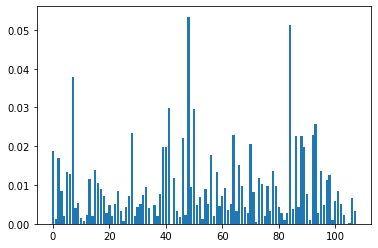

In [34]:
from matplotlib import pyplot
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [35]:
score = pd.DataFrame(importance)
score

,0
0,0.018889
1,0.001355
2,0.017040
3,0.008356
4,0.002045
...,...
103,0.002397
104,0.000000
105,0.000080
106,0.006726


In [36]:
gene_score = pd.DataFrame(degs_gene_id)
gene_score["score"] = score

In [37]:
gene_score

,X,score
0,SLC39A8,0.018889
1,RHAG,0.001355
2,DDIT4,0.017040
3,MPO,0.008356
4,RRM2,0.002045
...,...,...
103,KIF2C,0.002397
104,POLE2,0.000000
105,UBE2C,0.000080
106,AURKB,0.006726


In [38]:
gene_score.to_csv("gene_score.csv")

In [39]:
gene = []
for i in degs_gene_id:
    gene.append(i)
gene_rank = []
gene_score_ind = []
for i in range(108):
    max_ind = np.argmax(importance)
    gene_rank.append(gene[max_ind])
    gene_score_ind.append(max_ind)
    importance[max_ind] = 0

In [40]:
a = gene_score_ind
total_comb = [None]*108
for i in range(108):
    arr = []
    for j in range(0, i + 1):
        arr.append(a[j])
    total_comb[i] = arr
    

In [41]:
for val in total_comb:
    print(val)

[48]
[48, 84]
[48, 84, 7]
[48, 84, 7, 41]
[48, 84, 7, 41, 50]
[48, 84, 7, 41, 50, 93]
[48, 84, 7, 41, 50, 93, 28]
[48, 84, 7, 41, 50, 93, 28, 92]
[48, 84, 7, 41, 50, 93, 28, 92, 64]
[48, 84, 7, 41, 50, 93, 28, 92, 64, 88]
[48, 84, 7, 41, 50, 93, 28, 92, 64, 88, 86]
[48, 84, 7, 41, 50, 93, 28, 92, 64, 88, 86, 46]
[48, 84, 7, 41, 50, 93, 28, 92, 64, 88, 86, 46, 70]
[48, 84, 7, 41, 50, 93, 28, 92, 64, 88, 86, 46, 70, 89]
[48, 84, 7, 41, 50, 93, 28, 92, 64, 88, 86, 46, 70, 89, 39]
[48, 84, 7, 41, 50, 93, 28, 92, 64, 88, 86, 46, 70, 89, 39, 40]
[48, 84, 7, 41, 50, 93, 28, 92, 64, 88, 86, 46, 70, 89, 39, 40, 0]
[48, 84, 7, 41, 50, 93, 28, 92, 64, 88, 86, 46, 70, 89, 39, 40, 0, 56]
[48, 84, 7, 41, 50, 93, 28, 92, 64, 88, 86, 46, 70, 89, 39, 40, 0, 56, 2]
[48, 84, 7, 41, 50, 93, 28, 92, 64, 88, 86, 46, 70, 89, 39, 40, 0, 56, 2, 66]
[48, 84, 7, 41, 50, 93, 28, 92, 64, 88, 86, 46, 70, 89, 39, 40, 0, 56, 2, 66, 15]
[48, 84, 7, 41, 50, 93, 28, 92, 64, 88, 86, 46, 70, 89, 39, 40, 0, 56, 2, 66, 15, 

In [42]:
import numpy as np
import pandas as pd
from scipy import stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from rdea.utils.help_functions import model_based_relevance, auc_relevance, load_DEGs


import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
import warnings

# Comment these lines if you are not using Mac OS
import matplotlib as mpl
# Set random seed
seed = 8
np.random.seed(seed)

In [43]:
# ========== INPUTS ==========
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
# in and out files
data_file = './data/GSE66099.csv'
markers_file = './results/sepsis/fs_scores.csv'

out_file = './results/sepsis/fs_scores.csv'
is_save_results = True

# data pre-processing
is_normalize_samples = False
is_normalize_columns = True
norm_filter = MinMaxScaler()

# experiment
num_folds = 5

label = 'Died'
# Set random seed
seed = 8
np.random.seed(seed)

# classifiers
models = [
  ('SVM-RBF',SVC(kernel='rbf',probability=True)),
  ('RF', RandomForestClassifier(n_estimators=100,  random_state=seed)),
  ('LR', SGDClassifier(loss="log", penalty="l2", random_state=seed)),
  ('KNN', KNeighborsClassifier(n_neighbors=15, p=2, n_jobs=-1)),
  ('Bagging', BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100, random_state=seed), n_estimators=10, random_state=seed)),  
  ('Boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=seed))      
 ]



In [44]:
def evaluate2(y_pred, y_test, y_probs):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)
    for i in range(len(y_test)):
        if (y_pred[i]==1 and y_test[i]==1):
            tp = tp + 1
        elif (y_pred[i]==0 and y_test[i]==0):
            tn = tn + 1
        elif (y_pred[i]==1 and y_test[i]==0):
            fp = fp + 1
        else:
            fn = fn + 1
    sn = tp/(tp+fn)
    sp = tn/(tn+fp)
    fpr = fp/(tn+fp)
    acc = (tp+tn)/(tp+fp+tn+fn)
    return  np.array([acc, sn, sp, auc])

In [45]:
from sklearn.model_selection import StratifiedKFold, KFold
from scipy import interp
from sklearn.metrics import *
def do_cross_validation_for_sing_model(X_comb, new_y, model, num_folds=5, random_state = 0, n_runs = 5):
   
    res = np.zeros(shape=(num_folds * n_runs, 4)) # 5 is the number of metrics
    count = 0
    for cv_run in range(n_runs):
        skf = StratifiedKFold(n_splits=num_folds, shuffle=True)
        for train_index, test_index in skf.split(X_comb, new_y):
            X_train2, X_test2 = X_comb[train_index], X_comb[test_index]
            y_train2, y_test2 = new_y[train_index], new_y[test_index]
            
            train_filtered = X_train2
            test_filtered = X_test2

            model.fit(train_filtered, y_train2)
            Y_probs = model.predict_proba(test_filtered)[:, 1]
            Y_pred = model.predict(test_filtered)

            res[count, :] = evaluate2(Y_pred, y_test2, Y_probs)
            count += 1
            
    return res

In [46]:
import math
def std_mean_cal(res):
    means = [None]*4
    stds = [None]*4
    for i in range(4):
        mean = round(np.mean(res[:,i]),2)
        means[i] = mean
#         std = sum(np.square(res[:,i] - means[i]))/25
        stds[i] = round(np.std(res[:,i]),2)
    M = [means, stds]
    return M


In [48]:
print('Performance reported using:\t ACC\tSn\tSp\tMCC\tAUC')

for model in models:
    count = 0
    total = []
    for comb in total_comb:
        X_comb = pd.DataFrame((X_train)[:,comb])
        num_runs = 5
        res = do_cross_validation_for_sing_model(X_comb.values, y_train, model=model[1], num_folds=5, n_runs=5)
        result = std_mean_cal(res)
        count += 1
        mean_std = {
            "Comb": comb,
            "ACC": str((result[0])[0]) + "+-" + str((result[1])[0]),
            "Sn": str((result[0])[1]) + "+-" + str((result[1])[1]),
            "Sp": str((result[0])[2]) + "+-" + str((result[1])[2]),
            "AUC": str((result[0])[3]) + "+-" + str((result[1])[3])
        }
        total.append(mean_std)
        print(res)
        print(count)
        print('---------------------------------------------------------------')
    file_name = model[0] + "- result.csv"
    (pd.DataFrame(total)).to_csv(file_name)

Performance reported using:	 ACC	Sn	Sp	MCC	AUC
[[0.8        0.33333333 0.88235294 0.92156863]
 [0.9        0.33333333 1.         0.43137255]
 [0.85       0.         1.         1.        ]
 [0.9        0.66666667 0.94117647 0.74509804]
 [0.89473684 0.         1.         0.38235294]
 [0.95       0.66666667 1.         0.70588235]
 [0.85       0.33333333 0.94117647 0.68627451]
 [0.9        0.66666667 0.94117647 0.96078431]
 [0.9        0.33333333 1.         0.76470588]
 [0.94736842 0.5        1.         0.67647059]
 [0.95       0.66666667 1.         0.98039216]
 [0.9        0.33333333 1.         0.45098039]
 [0.8        0.33333333 0.88235294 0.68627451]
 [0.95       0.66666667 1.         0.94117647]
 [0.89473684 0.         1.         0.29411765]
 [0.95       0.66666667 1.         0.78431373]
 [0.9        0.66666667 0.94117647 0.8627451 ]
 [0.95       0.66666667 1.         0.98039216]
 [0.8        0.         0.94117647 0.        ]
 [0.89473684 0.5        0.94117647 0.64705882]
 [0.85       

[[0.85       0.         1.         1.        ]
 [0.85       0.33333333 0.94117647 0.90196078]
 [0.9        0.33333333 1.         0.96078431]
 [0.85       0.33333333 0.94117647 0.82352941]
 [0.89473684 0.5        0.94117647 0.97058824]
 [0.95       0.66666667 1.         0.96078431]
 [0.85       0.66666667 0.88235294 0.90196078]
 [0.85       0.33333333 0.94117647 0.90196078]
 [0.8        0.         0.94117647 0.80392157]
 [0.89473684 0.         1.         0.91176471]
 [0.85       0.33333333 0.94117647 0.78431373]
 [0.9        0.66666667 0.94117647 0.94117647]
 [0.9        0.33333333 1.         0.90196078]
 [0.9        0.66666667 0.94117647 0.92156863]
 [0.94736842 0.5        1.         1.        ]
 [0.85       0.         1.         0.96078431]
 [0.95       0.66666667 1.         0.98039216]
 [0.75       0.         0.88235294 0.66666667]
 [0.85       0.         1.         1.        ]
 [0.89473684 0.5        0.94117647 0.97058824]
 [0.85       0.33333333 0.94117647 0.80392157]
 [0.9        

[[0.9        0.33333333 1.         0.98039216]
 [0.85       0.         1.         1.        ]
 [0.9        0.33333333 1.         0.94117647]
 [0.8        0.         0.94117647 0.70588235]
 [0.89473684 0.         1.         1.        ]
 [0.9        0.33333333 1.         1.        ]
 [0.95       0.66666667 1.         0.98039216]
 [0.9        0.33333333 1.         0.94117647]
 [0.9        0.33333333 1.         0.88235294]
 [0.89473684 0.         1.         0.85294118]
 [0.9        0.33333333 1.         0.94117647]
 [0.85       0.         1.         1.        ]
 [0.9        0.33333333 1.         0.88235294]
 [0.85       0.33333333 0.94117647 0.88235294]
 [0.89473684 0.5        0.94117647 0.97058824]
 [0.95       0.66666667 1.         1.        ]
 [0.8        0.         0.94117647 0.80392157]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.8627451 ]
 [0.89473684 0.5        0.94117647 0.94117647]
 [0.9        0.33333333 1.         0.88235294]
 [0.8        

[[0.9        0.33333333 1.         0.88235294]
 [0.9        0.33333333 1.         0.88235294]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         1.        ]
 [0.94736842 0.5        1.         0.91176471]
 [0.9        0.33333333 1.         0.82352941]
 [0.9        0.33333333 1.         1.        ]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.84313725]
 [0.89473684 0.5        0.94117647 0.88235294]
 [0.8        0.66666667 0.82352941 0.88235294]
 [0.85       0.         1.         0.88235294]
 [0.85       0.         1.         0.78431373]
 [0.85       0.         1.         0.98039216]
 [0.94736842 0.5        1.         1.        ]
 [0.85       0.         1.         0.92156863]
 [0.9        0.33333333 1.         0.96078431]
 [0.85       0.         1.         0.84313725]
 [0.9        0.33333333 1.         0.92156863]
 [1.         1.         1.         1.        ]
 [0.85       0.         1.         0.82352941]
 [0.85       

[[0.8        0.         0.94117647 0.7254902 ]
 [0.85       0.         1.         0.92156863]
 [0.85       0.         1.         1.        ]
 [0.9        0.33333333 1.         0.84313725]
 [0.94736842 0.5        1.         0.97058824]
 [0.9        0.33333333 1.         0.94117647]
 [0.9        0.33333333 1.         0.96078431]
 [0.9        0.33333333 1.         0.88235294]
 [0.9        0.33333333 1.         0.92156863]
 [0.94736842 0.5        1.         1.        ]
 [0.9        0.33333333 1.         0.92156863]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.88235294]
 [0.94736842 0.5        1.         0.73529412]
 [0.85       0.         1.         0.94117647]
 [0.85       0.         1.         0.8627451 ]
 [0.85       0.         1.         0.90196078]
 [0.85       0.         1.         0.96078431]
 [0.89473684 0.5        0.94117647 0.94117647]
 [0.9        0.33333333 1.         0.90196078]
 [0.9        

[[0.9        0.33333333 1.         0.88235294]
 [0.85       0.         1.         0.92156863]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.98039216]
 [0.89473684 0.5        0.94117647 0.85294118]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.84313725]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.84313725]
 [0.89473684 0.         1.         0.91176471]
 [0.8        0.         0.94117647 0.88235294]
 [0.9        0.33333333 1.         0.94117647]
 [0.9        0.33333333 1.         0.74509804]
 [0.85       0.         1.         1.        ]
 [0.89473684 0.         1.         0.82352941]
 [0.9        0.33333333 1.         0.96078431]
 [0.9        0.33333333 1.         1.        ]
 [0.8        0.         0.94117647 0.78431373]
 [0.85       0.         1.         0.84313725]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.78431373]
 [0.9        

[[0.85       0.         1.         0.70588235]
 [0.85       0.         1.         0.80392157]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         1.        ]
 [0.94736842 0.5        1.         1.        ]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.92156863]
 [0.85       0.         1.         0.82352941]
 [0.85       0.33333333 0.94117647 0.74509804]
 [0.89473684 0.         1.         0.94117647]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.94117647]
 [0.85       0.         1.         0.82352941]
 [0.85       0.         1.         0.98039216]
 [0.84210526 0.         0.94117647 0.70588235]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.96078431]
 [0.8        0.         0.94117647 0.74509804]
 [0.85       0.         1.         0.80392157]
 [0.89473684 0.         1.         0.76470588]
 [0.85       0.         1.         1.        ]
 [0.85       

[[0.85       0.         1.         1.        ]
 [0.9        0.33333333 1.         0.8627451 ]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.88235294]
 [0.73684211 0.         0.82352941 0.47058824]
 [0.85       0.         1.         0.94117647]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.8627451 ]
 [0.85       0.         1.         0.98039216]
 [0.89473684 0.         1.         0.76470588]
 [0.85       0.         1.         0.84313725]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.80392157]
 [0.85       0.         1.         0.98039216]
 [0.89473684 0.         1.         0.91176471]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.76470588]
 [0.85       0.         1.         0.90196078]
 [0.85       0.         1.         0.96078431]
 [0.89473684 0.         1.         0.79411765]
 [0.8        0.         0.94117647 0.70588235]
 [0.85       

[[0.85       0.         1.         0.98039216]
 [0.85       0.         1.         0.88235294]
 [0.85       0.         1.         0.78431373]
 [0.85       0.         1.         0.90196078]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.90196078]
 [0.85       0.         1.         0.82352941]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.96078431]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.88235294]
 [0.85       0.         1.         0.94117647]
 [0.85       0.         1.         0.66666667]
 [0.85       0.         1.         0.92156863]
 [0.89473684 0.         1.         0.94117647]
 [0.85       0.         1.         0.76470588]
 [0.85       0.         1.         0.98039216]
 [0.85       0.         1.         0.8627451 ]
 [0.85       0.         1.         0.88235294]
 [0.89473684 0.         1.         0.91176471]
 [0.9        0.33333333 1.         0.82352941]
 [0.85       

[[0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.92156863]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.70588235]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.92156863]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.84313725]
 [0.85       0.         1.         0.92156863]
 [0.89473684 0.         1.         0.52941176]
 [0.85       0.         1.         0.76470588]
 [0.85       0.         1.         0.98039216]
 [0.85       0.         1.         0.78431373]
 [0.85       0.         1.         0.84313725]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.82352941]
 [0.85       0.         1.         0.94117647]
 [0.85       0.         1.         0.74509804]
 [0.89473684 0.         1.         0.79411765]
 [0.85       0.         1.         0.98039216]
 [0.85       

[[0.85       0.         1.         0.68627451]
 [0.85       0.         1.         0.98039216]
 [0.85       0.         1.         0.82352941]
 [0.85       0.         1.         0.92156863]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.84313725]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.80392157]
 [0.85       0.         1.         0.76470588]
 [0.89473684 0.         1.         0.85294118]
 [0.85       0.         1.         0.7254902 ]
 [0.85       0.         1.         0.98039216]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.98039216]
 [0.89473684 0.         1.         0.79411765]
 [0.85       0.         1.         0.80392157]
 [0.85       0.         1.         0.76470588]
 [0.85       0.         1.         0.88235294]
 [0.85       0.         1.         0.96078431]
 [0.89473684 0.         1.         0.88235294]
 [0.85       0.         1.         0.7254902 ]
 [0.85       

[[0.85       0.         1.         0.88235294]
 [0.85       0.         1.         0.88235294]
 [0.85       0.         1.         0.78431373]
 [0.85       0.         1.         0.66666667]
 [0.89473684 0.         1.         0.94117647]
 [0.85       0.         1.         0.49019608]
 [0.85       0.         1.         0.94117647]
 [0.85       0.         1.         0.92156863]
 [0.85       0.         1.         0.88235294]
 [0.89473684 0.         1.         0.88235294]
 [0.85       0.         1.         0.84313725]
 [0.85       0.         1.         0.88235294]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.62745098]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.90196078]
 [0.85       0.         1.         0.82352941]
 [0.85       0.         1.         0.62745098]
 [0.85       0.         1.         0.96078431]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.7254902 ]
 [0.85       

[[0.85       0.         1.         0.94117647]
 [0.85       0.         1.         0.7254902 ]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.96078431]
 [0.89473684 0.         1.         0.47058824]
 [0.85       0.         1.         0.92156863]
 [0.85       0.         1.         0.68627451]
 [0.85       0.         1.         0.7254902 ]
 [0.85       0.         1.         0.88235294]
 [0.89473684 0.         1.         0.94117647]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.98039216]
 [0.85       0.         1.         0.70588235]
 [0.85       0.         1.         0.94117647]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.88235294]
 [0.85       0.         1.         0.90196078]
 [0.85       0.         1.         0.62745098]
 [0.85       0.         1.         0.84313725]
 [0.89473684 0.         1.         0.88235294]
 [0.85       0.         1.         0.60784314]
 [0.85       

[[0.85       0.         1.         0.7254902 ]
 [0.85       0.         1.         0.88235294]
 [0.85       0.         1.         0.76470588]
 [0.85       0.         1.         0.94117647]
 [0.89473684 0.         1.         0.91176471]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.90196078]
 [0.85       0.         1.         0.80392157]
 [0.85       0.         1.         0.8627451 ]
 [0.89473684 0.         1.         0.64705882]
 [0.85       0.         1.         0.8627451 ]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.8627451 ]
 [0.85       0.         1.         0.76470588]
 [0.89473684 0.         1.         0.94117647]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.98039216]
 [0.85       0.         1.         0.78431373]
 [0.85       0.         1.         0.94117647]
 [0.89473684 0.         1.         0.70588235]
 [0.85       0.         1.         0.8627451 ]
 [0.85       

[[0.7        0.         0.82352941 0.52941176]
 [0.85       0.         1.         0.64705882]
 [0.8        1.         0.76470588 1.        ]
 [0.85       0.33333333 0.94117647 0.58823529]
 [0.84210526 0.5        0.88235294 0.88235294]
 [0.85       0.33333333 0.94117647 0.52941176]
 [0.85       0.33333333 0.94117647 0.74509804]
 [0.9        0.33333333 1.         0.58823529]
 [0.85       0.66666667 0.88235294 0.94117647]
 [0.73684211 0.5        0.76470588 0.63235294]
 [0.75       0.66666667 0.76470588 0.92156863]
 [0.8        0.33333333 0.88235294 0.54901961]
 [0.8        0.         0.94117647 0.49019608]
 [0.9        0.33333333 1.         0.78431373]
 [0.89473684 0.5        0.94117647 0.67647059]
 [0.8        0.33333333 0.88235294 0.70588235]
 [0.85       0.33333333 0.94117647 0.60784314]
 [0.85       0.33333333 0.94117647 0.52941176]
 [0.7        0.33333333 0.76470588 0.84313725]
 [0.94736842 0.5        1.         0.69117647]
 [0.9        0.33333333 1.         0.79411765]
 [0.7        

[[0.9        0.33333333 1.         0.92156863]
 [0.9        0.66666667 0.94117647 0.94117647]
 [0.9        0.33333333 1.         0.94117647]
 [0.85       0.33333333 0.94117647 0.92156863]
 [0.89473684 0.5        0.94117647 0.94117647]
 [0.85       0.         1.         0.85294118]
 [0.8        0.33333333 0.88235294 0.88235294]
 [0.9        0.33333333 1.         0.99019608]
 [1.         1.         1.         1.        ]
 [0.89473684 0.5        0.94117647 0.95588235]
 [0.85       0.33333333 0.94117647 0.94117647]
 [0.95       1.         0.94117647 1.        ]
 [0.85       0.33333333 0.94117647 0.92156863]
 [0.9        0.33333333 1.         0.88235294]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.94117647]
 [0.8        0.66666667 0.82352941 0.81372549]
 [0.9        0.33333333 1.         0.98039216]
 [0.85       0.         1.         0.96078431]
 [1.         1.         1.         1.        ]
 [0.85       0.33333333 0.94117647 0.84313725]
 [0.8        

[[0.85       0.         1.         0.94117647]
 [0.85       0.33333333 0.94117647 0.92156863]
 [0.95       0.66666667 1.         1.        ]
 [0.85       0.         1.         0.79411765]
 [0.94736842 0.5        1.         0.91176471]
 [0.9        0.66666667 0.94117647 0.94117647]
 [0.85       0.         1.         0.83333333]
 [0.9        0.33333333 1.         1.        ]
 [0.9        0.33333333 1.         0.92156863]
 [0.84210526 0.         0.94117647 0.88235294]
 [0.85       0.         1.         1.        ]
 [0.9        0.33333333 1.         0.92156863]
 [0.95       0.66666667 1.         0.98039216]
 [0.85       0.         1.         0.92156863]
 [1.         1.         1.         1.        ]
 [0.85       0.33333333 0.94117647 0.89215686]
 [0.85       0.         1.         0.94117647]
 [0.9        0.33333333 1.         1.        ]
 [0.9        0.33333333 1.         1.        ]
 [0.94736842 1.         0.94117647 0.98529412]
 [0.85       0.         1.         0.98039216]
 [0.9        

[[0.9        0.33333333 1.         0.98039216]
 [0.9        0.33333333 1.         0.85294118]
 [0.9        0.33333333 1.         0.92156863]
 [0.9        0.33333333 1.         0.84313725]
 [0.94736842 0.5        1.         1.        ]
 [0.9        0.33333333 1.         0.85294118]
 [0.9        0.66666667 0.94117647 0.90196078]
 [0.9        0.33333333 1.         0.84313725]
 [0.9        0.33333333 1.         0.94117647]
 [0.89473684 0.         1.         1.        ]
 [0.95       0.66666667 1.         0.95098039]
 [0.85       0.         1.         0.8627451 ]
 [0.9        0.33333333 1.         0.84313725]
 [0.95       0.66666667 1.         0.98039216]
 [0.94736842 0.5        1.         1.        ]
 [0.9        0.33333333 1.         0.90196078]
 [0.95       0.66666667 1.         0.88235294]
 [0.95       0.66666667 1.         0.95098039]
 [0.85       0.33333333 0.94117647 0.94117647]
 [0.89473684 0.         1.         0.98529412]
 [0.85       0.         1.         0.92156863]
 [1.         

[[0.85       0.         1.         0.90196078]
 [0.85       0.         1.         0.7745098 ]
 [0.9        0.33333333 1.         1.        ]
 [1.         1.         1.         1.        ]
 [0.89473684 0.         1.         0.89705882]
 [0.9        0.33333333 1.         0.98039216]
 [0.85       0.         1.         0.95098039]
 [0.95       0.66666667 1.         1.        ]
 [0.9        0.33333333 1.         0.81372549]
 [0.89473684 0.5        0.94117647 0.85294118]
 [0.85       0.         1.         0.90196078]
 [1.         1.         1.         1.        ]
 [0.9        0.66666667 0.94117647 0.90196078]
 [0.9        0.33333333 1.         0.93137255]
 [0.89473684 0.         1.         0.86764706]
 [0.85       0.         1.         0.85294118]
 [0.95       0.66666667 1.         0.98039216]
 [0.9        0.33333333 1.         1.        ]
 [0.8        0.33333333 0.88235294 0.80392157]
 [0.89473684 0.         1.         0.94117647]
 [0.9        0.33333333 1.         0.94117647]
 [0.9        

[[0.85       0.         1.         0.93137255]
 [0.85       0.         1.         0.94117647]
 [0.95       0.66666667 1.         0.85294118]
 [0.9        0.33333333 1.         0.93137255]
 [0.89473684 0.         1.         0.82352941]
 [0.9        0.33333333 1.         0.60784314]
 [0.8        0.         0.94117647 0.73529412]
 [0.9        0.33333333 1.         0.92156863]
 [0.9        0.33333333 1.         0.96078431]
 [0.89473684 0.         1.         1.        ]
 [0.9        0.33333333 1.         0.81372549]
 [0.9        0.33333333 1.         0.92156863]
 [0.9        0.33333333 1.         0.87254902]
 [0.85       0.         1.         0.94117647]
 [0.89473684 0.5        0.94117647 0.97058824]
 [0.9        0.33333333 1.         0.84313725]
 [0.9        0.33333333 1.         0.92156863]
 [0.85       0.         1.         0.94117647]
 [0.95       0.66666667 1.         0.8627451 ]
 [0.94736842 0.5        1.         1.        ]
 [0.9        0.33333333 1.         0.96078431]
 [0.9        

[[0.9        0.33333333 1.         0.98039216]
 [0.95       0.66666667 1.         1.        ]
 [0.85       0.         1.         0.58823529]
 [0.9        0.33333333 1.         0.92156863]
 [0.89473684 0.         1.         0.94117647]
 [0.95       0.66666667 1.         0.93137255]
 [0.9        0.33333333 1.         0.82352941]
 [0.9        0.33333333 1.         0.78431373]
 [0.95       0.66666667 1.         0.96078431]
 [0.89473684 0.         1.         0.82352941]
 [0.85       0.         1.         0.90196078]
 [1.         1.         1.         1.        ]
 [0.85       0.         1.         0.73529412]
 [0.9        0.33333333 1.         0.97058824]
 [0.94736842 0.5        1.         1.        ]
 [0.9        0.33333333 1.         1.        ]
 [0.95       0.66666667 1.         0.92156863]
 [0.9        0.33333333 1.         0.89215686]
 [0.85       0.         1.         0.92156863]
 [0.89473684 0.         1.         0.85294118]
 [0.9        0.33333333 1.         0.89215686]
 [1.         

[[0.8        0.         0.94117647 0.82352941]
 [0.9        0.33333333 1.         0.79411765]
 [0.9        0.33333333 1.         0.87254902]
 [0.9        0.33333333 1.         0.92156863]
 [0.94736842 1.         0.94117647 0.97058824]
 [0.75       0.         0.88235294 0.70588235]
 [0.85       0.         1.         0.80392157]
 [0.9        0.33333333 1.         1.        ]
 [0.9        0.33333333 1.         0.98039216]
 [1.         1.         1.         1.        ]
 [0.9        0.33333333 1.         1.        ]
 [0.9        0.33333333 1.         0.81372549]
 [0.85       0.         1.         0.89215686]
 [0.85       0.         1.         0.69607843]
 [0.89473684 0.         1.         0.85294118]
 [0.9        0.33333333 1.         0.67647059]
 [0.95       0.66666667 1.         0.94117647]
 [0.85       0.         1.         0.92156863]
 [0.85       0.         1.         0.93137255]
 [0.94736842 0.5        1.         0.80882353]
 [0.95       0.66666667 1.         0.89215686]
 [0.85       

[[0.85       0.         1.         0.88235294]
 [0.9        0.33333333 1.         0.96078431]
 [0.95       0.66666667 1.         0.96078431]
 [0.9        0.33333333 1.         0.82352941]
 [0.94736842 0.5        1.         1.        ]
 [0.85       0.         1.         0.94117647]
 [0.9        0.33333333 1.         0.88235294]
 [0.9        0.33333333 1.         0.92156863]
 [0.85       0.         1.         0.8627451 ]
 [0.84210526 0.         0.94117647 0.94117647]
 [0.95       0.66666667 1.         1.        ]
 [0.9        0.33333333 1.         0.81372549]
 [0.9        0.66666667 0.94117647 0.98039216]
 [0.85       0.         1.         0.8627451 ]
 [0.89473684 0.         1.         0.79411765]
 [0.85       0.         1.         0.70588235]
 [0.95       0.66666667 1.         1.        ]
 [0.9        0.33333333 1.         0.96078431]
 [0.8        0.         0.94117647 0.92156863]
 [0.84210526 0.         0.94117647 0.70588235]
 [0.85       0.         1.         0.88235294]
 [0.95       

[[1.         1.         1.         1.        ]
 [0.85       0.         1.         0.78431373]
 [0.9        0.33333333 1.         0.88235294]
 [0.9        0.33333333 1.         0.98039216]
 [0.89473684 0.         1.         0.77941176]
 [0.9        0.33333333 1.         0.80392157]
 [0.9        0.33333333 1.         0.89215686]
 [0.85       0.         1.         0.96078431]
 [0.95       0.66666667 1.         1.        ]
 [0.89473684 0.         1.         0.70588235]
 [0.85       0.33333333 0.94117647 0.75490196]
 [0.85       0.         1.         0.73529412]
 [0.85       0.         1.         1.        ]
 [0.9        0.33333333 1.         0.85294118]
 [0.94736842 0.5        1.         0.94117647]
 [0.9        0.66666667 0.94117647 0.82352941]
 [0.9        0.33333333 1.         0.92156863]
 [0.9        0.33333333 1.         0.85294118]
 [0.9        0.33333333 1.         1.        ]
 [0.89473684 0.         1.         0.76470588]
 [0.9        0.33333333 1.         0.99019608]
 [0.9        

[[0.85       0.33333333 0.94117647 0.73529412]
 [0.85       0.         1.         0.80392157]
 [0.9        0.66666667 0.94117647 0.91176471]
 [0.85       0.         1.         0.96078431]
 [0.89473684 0.         1.         0.79411765]
 [0.9        0.33333333 1.         1.        ]
 [0.8        0.         0.94117647 0.42156863]
 [0.9        0.33333333 1.         0.82352941]
 [0.85       0.         1.         0.80392157]
 [0.94736842 0.5        1.         1.        ]
 [0.9        0.33333333 1.         1.        ]
 [0.85       0.         1.         0.6372549 ]
 [0.85       0.         1.         0.76470588]
 [0.95       0.66666667 1.         1.        ]
 [0.89473684 0.         1.         0.94117647]
 [0.9        0.33333333 1.         0.81372549]
 [0.85       0.         1.         0.92156863]
 [0.95       0.66666667 1.         1.        ]
 [0.9        0.33333333 1.         0.90196078]
 [0.94736842 0.5        1.         0.77941176]
 [0.95       0.66666667 1.         1.        ]
 [0.9        

[[0.9        0.33333333 1.         0.92156863]
 [0.85       0.         1.         0.81372549]
 [0.95       0.66666667 1.         0.98039216]
 [0.85       0.33333333 0.94117647 0.81372549]
 [0.89473684 0.         1.         0.88235294]
 [0.85       0.         1.         0.92156863]
 [0.95       0.66666667 1.         0.96078431]
 [0.85       0.33333333 0.94117647 0.67647059]
 [0.85       0.33333333 0.94117647 0.90196078]
 [0.89473684 0.         1.         1.        ]
 [0.9        0.33333333 1.         0.98039216]
 [0.9        0.33333333 1.         0.45098039]
 [0.85       0.         1.         0.84313725]
 [0.85       0.33333333 0.94117647 0.90196078]
 [0.84210526 0.         0.94117647 0.88235294]
 [0.9        0.33333333 1.         0.82352941]
 [0.95       0.66666667 1.         0.97058824]
 [0.85       0.         1.         0.68627451]
 [0.9        0.33333333 1.         0.98039216]
 [0.84210526 0.         0.94117647 0.82352941]
 [0.9        0.33333333 1.         0.82352941]
 [0.95       

[[0.85       0.         1.         0.71568627]
 [0.85       0.         1.         0.74509804]
 [0.85       0.33333333 0.94117647 0.88235294]
 [0.9        0.33333333 1.         1.        ]
 [0.94736842 0.5        1.         0.97058824]
 [0.85       0.         1.         0.7745098 ]
 [0.9        0.33333333 1.         0.7745098 ]
 [0.9        0.33333333 1.         0.75490196]
 [0.9        0.33333333 1.         1.        ]
 [1.         1.         1.         1.        ]
 [0.85       0.         1.         0.79411765]
 [0.9        0.33333333 1.         0.92156863]
 [0.9        0.33333333 1.         0.90196078]
 [0.9        0.33333333 1.         1.        ]
 [0.89473684 0.5        0.94117647 0.82352941]
 [0.85       0.         1.         0.76470588]
 [0.9        0.33333333 1.         0.73529412]
 [0.85       0.33333333 0.94117647 0.78431373]
 [0.85       0.         1.         0.98039216]
 [0.94736842 0.5        1.         0.97058824]
 [0.85       0.         1.         0.6372549 ]
 [0.85       

[[0.85       0.         1.         0.90196078]
 [0.9        0.33333333 1.         0.79411765]
 [0.9        0.33333333 1.         0.87254902]
 [0.85       0.         1.         0.71568627]
 [0.94736842 0.5        1.         0.76470588]
 [0.85       0.         1.         0.84313725]
 [0.85       0.         1.         0.66666667]
 [0.85       0.33333333 0.94117647 0.87254902]
 [0.9        0.33333333 1.         0.93137255]
 [0.94736842 0.5        1.         0.97058824]
 [0.85       0.         1.         0.58823529]
 [0.9        0.33333333 1.         0.96078431]
 [0.9        0.33333333 1.         0.82352941]
 [0.85       0.         1.         0.98039216]
 [0.94736842 0.5        1.         1.        ]
 [0.9        0.33333333 1.         0.90196078]
 [0.95       0.66666667 1.         0.96078431]
 [0.85       0.33333333 0.94117647 0.85294118]
 [0.85       0.         1.         0.93137255]
 [0.89473684 0.         1.         0.54411765]
 [0.9        0.66666667 0.94117647 0.91176471]
 [0.85       

[[0.85       0.         1.         0.94117647]
 [0.85       0.         1.         0.90196078]
 [0.85       0.33333333 0.94117647 0.87254902]
 [0.9        0.33333333 1.         0.82352941]
 [0.89473684 0.         1.         0.83823529]
 [0.85       0.         1.         0.69607843]
 [0.85       0.         1.         0.98039216]
 [0.9        0.33333333 1.         0.75490196]
 [0.85       0.         1.         0.96078431]
 [0.89473684 0.         1.         0.67647059]
 [0.9        0.33333333 1.         0.88235294]
 [0.85       0.33333333 0.94117647 0.96078431]
 [0.85       0.         1.         0.81372549]
 [0.85       0.         1.         0.90196078]
 [0.94736842 0.5        1.         0.70588235]
 [0.9        0.33333333 1.         0.76470588]
 [0.85       0.         1.         0.87254902]
 [0.9        0.33333333 1.         0.99019608]
 [0.75       0.         0.88235294 0.47058824]
 [0.89473684 0.         1.         0.97058824]
 [0.9        0.33333333 1.         1.        ]
 [0.9        

[[0.85       0.         1.         0.71568627]
 [0.85       0.         1.         0.85294118]
 [0.9        0.33333333 1.         1.        ]
 [0.85       0.         1.         0.81372549]
 [0.89473684 0.         1.         0.69117647]
 [0.85       0.         1.         0.76470588]
 [0.85       0.         1.         0.98039216]
 [0.9        0.33333333 1.         0.84313725]
 [0.9        0.33333333 1.         0.82352941]
 [0.94736842 0.5        1.         1.        ]
 [0.85       0.         1.         0.93137255]
 [0.9        0.33333333 1.         0.70588235]
 [0.95       0.66666667 1.         0.82352941]
 [0.85       0.         1.         0.97058824]
 [0.89473684 0.         1.         0.55882353]
 [0.9        0.33333333 1.         0.93137255]
 [0.85       0.         1.         0.68627451]
 [0.8        0.         0.94117647 0.68627451]
 [0.9        0.33333333 1.         0.94117647]
 [0.94736842 0.5        1.         0.70588235]
 [0.9        0.33333333 1.         1.        ]
 [0.85       

[[0.85       0.         1.         0.84313725]
 [0.95       1.         0.94117647 0.96078431]
 [0.85       0.66666667 0.88235294 0.88235294]
 [0.85       0.         1.         0.39215686]
 [0.94736842 0.5        1.         0.70588235]
 [0.95       0.66666667 1.         0.76470588]
 [0.85       0.33333333 0.94117647 0.64705882]
 [0.55       0.33333333 0.58823529 0.45098039]
 [0.95       0.66666667 1.         1.        ]
 [0.84210526 0.         0.94117647 0.88235294]
 [0.85       0.         1.         0.78431373]
 [0.9        0.66666667 0.94117647 0.92156863]
 [0.85       0.         1.         0.47058824]
 [0.8        0.66666667 0.82352941 0.84313725]
 [0.94736842 0.5        1.         1.        ]
 [0.85       0.         1.         0.64705882]
 [0.3        1.         0.17647059 1.        ]
 [0.8        0.66666667 0.82352941 0.82352941]
 [0.95       0.66666667 1.         0.88235294]
 [0.78947368 0.5        0.82352941 0.5       ]
 [0.75       0.66666667 0.76470588 0.70588235]
 [0.9        

[[0.85       0.33333333 0.94117647 0.92156863]
 [0.9        0.33333333 1.         0.98039216]
 [0.9        0.33333333 1.         0.70588235]
 [0.75       1.         0.70588235 0.94117647]
 [0.94736842 0.5        1.         0.67647059]
 [0.95       0.66666667 1.         0.98039216]
 [0.5        1.         0.41176471 1.        ]
 [0.85       0.33333333 0.94117647 0.60784314]
 [0.95       1.         0.94117647 0.98039216]
 [0.84210526 0.         0.94117647 0.79411765]
 [0.85       0.         1.         0.68627451]
 [0.85       0.         1.         0.88235294]
 [0.85       1.         0.82352941 0.94117647]
 [0.9        0.33333333 1.         0.78431373]
 [0.89473684 0.         1.         1.        ]
 [0.7        1.         0.64705882 0.92156863]
 [0.9        0.33333333 1.         0.94117647]
 [0.85       0.33333333 0.94117647 0.62745098]
 [0.85       0.66666667 0.88235294 0.70588235]
 [0.84210526 0.         0.94117647 0.88235294]
 [0.85       0.         1.         0.66666667]
 [0.85       

[[0.85       0.         1.         0.90196078]
 [0.9        0.33333333 1.         0.92156863]
 [0.9        0.66666667 0.94117647 0.92156863]
 [0.8        0.         0.94117647 0.54901961]
 [0.84210526 0.         0.94117647 0.52941176]
 [0.8        0.         0.94117647 0.92156863]
 [0.9        0.33333333 1.         0.96078431]
 [0.85       0.66666667 0.88235294 0.74509804]
 [0.75       0.         0.88235294 0.62745098]
 [0.73684211 1.         0.70588235 0.86764706]
 [0.85       0.66666667 0.88235294 0.92156863]
 [0.75       0.         0.88235294 0.80392157]
 [0.95       1.         0.94117647 0.98039216]
 [0.8        0.         0.94117647 0.76470588]
 [0.68421053 1.         0.64705882 1.        ]
 [0.9        0.33333333 1.         0.84313725]
 [0.7        0.66666667 0.70588235 0.74509804]
 [0.75       0.33333333 0.82352941 0.76470588]
 [0.95       0.66666667 1.         0.92156863]
 [0.89473684 0.         1.         0.91176471]
 [0.8        1.         0.76470588 0.88235294]
 [0.85       

[[0.9        0.33333333 1.         0.43137255]
 [0.8        0.         0.94117647 0.92156863]
 [0.5        1.         0.41176471 0.92156863]
 [0.8        1.         0.76470588 0.94117647]
 [0.89473684 0.5        0.94117647 0.91176471]
 [0.95       0.66666667 1.         0.92156863]
 [0.9        0.66666667 0.94117647 0.8627451 ]
 [0.9        0.33333333 1.         0.92156863]
 [0.85       0.33333333 0.94117647 0.74509804]
 [0.68421053 0.5        0.70588235 0.47058824]
 [0.85       0.33333333 0.94117647 0.74509804]
 [0.85       0.         1.         0.94117647]
 [0.8        1.         0.76470588 0.85294118]
 [0.95       1.         0.94117647 0.94117647]
 [0.89473684 0.         1.         0.67647059]
 [0.85       0.33333333 0.94117647 0.66666667]
 [0.85       1.         0.82352941 0.94117647]
 [0.9        1.         0.88235294 0.94117647]
 [0.6        1.         0.52941176 0.93137255]
 [0.78947368 0.5        0.82352941 0.55882353]
 [0.7        0.33333333 0.76470588 0.82352941]
 [0.85       

[[0.85       0.33333333 0.94117647 0.76470588]
 [0.85       0.         1.         0.62745098]
 [0.65       0.33333333 0.70588235 0.80392157]
 [0.85       0.33333333 0.94117647 0.8627451 ]
 [0.73684211 1.         0.70588235 1.        ]
 [0.85       0.33333333 0.94117647 0.84313725]
 [0.9        1.         0.88235294 0.96078431]
 [0.5        0.33333333 0.52941176 0.52941176]
 [0.8        0.66666667 0.82352941 0.8627451 ]
 [0.89473684 0.         1.         0.5       ]
 [0.8        0.         0.94117647 0.60784314]
 [0.9        0.33333333 1.         0.96078431]
 [0.85       1.         0.82352941 1.        ]
 [0.75       0.66666667 0.76470588 0.74509804]
 [0.94736842 0.5        1.         0.94117647]
 [0.65       0.66666667 0.64705882 0.59803922]
 [0.9        1.         0.88235294 0.92156863]
 [0.85       0.33333333 0.94117647 0.96078431]
 [0.9        0.33333333 1.         0.90196078]
 [0.73684211 0.         0.82352941 0.5       ]
 [0.7        0.66666667 0.70588235 0.70588235]
 [0.85       

[[0.5        1.         0.41176471 0.91176471]
 [0.85       0.         1.         0.84313725]
 [0.8        0.33333333 0.88235294 0.47058824]
 [0.9        0.33333333 1.         0.96078431]
 [0.84210526 0.         0.94117647 0.94117647]
 [0.85       0.         1.         0.8627451 ]
 [0.85       0.66666667 0.88235294 0.90196078]
 [0.9        0.33333333 1.         0.68627451]
 [0.85       0.         1.         0.80392157]
 [0.78947368 0.         0.88235294 0.73529412]
 [0.85       0.         1.         0.92156863]
 [0.8        0.33333333 0.88235294 0.92156863]
 [0.75       0.66666667 0.76470588 0.73529412]
 [0.8        0.         0.94117647 0.60784314]
 [0.78947368 1.         0.76470588 0.94117647]
 [0.8        0.66666667 0.82352941 0.76470588]
 [0.8        0.         0.94117647 0.66666667]
 [0.95       1.         0.94117647 0.98039216]
 [0.8        0.33333333 0.88235294 0.74509804]
 [0.68421053 1.         0.64705882 0.91176471]
 [0.8        0.33333333 0.88235294 0.45098039]
 [0.9        

[[0.9        0.33333333 1.         0.66666667]
 [0.95       0.66666667 1.         0.94117647]
 [0.8        0.33333333 0.88235294 0.7254902 ]
 [0.85       0.         1.         0.84313725]
 [0.89473684 0.         1.         0.47058824]
 [0.75       0.33333333 0.82352941 0.66666667]
 [0.8        0.         0.94117647 0.66666667]
 [0.8        1.         0.76470588 0.96078431]
 [0.8        1.         0.76470588 0.91176471]
 [0.89473684 0.         1.         0.97058824]
 [0.8        0.66666667 0.82352941 0.7254902 ]
 [0.9        1.         0.88235294 0.96078431]
 [0.9        0.33333333 1.         0.7254902 ]
 [0.85       0.         1.         0.60784314]
 [0.78947368 1.         0.76470588 1.        ]
 [0.9        0.66666667 0.94117647 0.92156863]
 [0.85       0.         1.         0.47058824]
 [0.85       0.66666667 0.88235294 0.91176471]
 [0.85       0.         1.         0.68627451]
 [0.89473684 0.         1.         0.85294118]
 [0.85       0.33333333 0.94117647 0.68627451]
 [0.85       

[[0.9        0.33333333 1.         0.78431373]
 [0.85       0.         1.         0.98039216]
 [0.85       0.33333333 0.94117647 0.70588235]
 [0.9        0.33333333 1.         0.84313725]
 [0.89473684 0.         1.         0.5       ]
 [0.95       1.         0.94117647 0.98039216]
 [0.85       0.         1.         0.74509804]
 [0.85       0.         1.         0.82352941]
 [0.9        0.33333333 1.         0.66666667]
 [0.89473684 0.5        0.94117647 0.97058824]
 [0.95       0.66666667 1.         1.        ]
 [0.85       0.33333333 0.94117647 0.93137255]
 [0.75       0.         0.88235294 0.66666667]
 [0.8        0.33333333 0.88235294 0.52941176]
 [0.68421053 0.5        0.70588235 0.61764706]
 [0.85       1.         0.82352941 0.89215686]
 [0.85       0.         1.         0.92156863]
 [0.85       1.         0.82352941 0.94117647]
 [0.75       0.         0.88235294 0.60784314]
 [0.94736842 1.         0.94117647 0.94117647]
 [0.8        0.33333333 0.88235294 0.64705882]
 [0.8        

[[0.9        1.         0.88235294 0.92156863]
 [0.8        0.66666667 0.82352941 0.90196078]
 [0.65       1.         0.58823529 0.88235294]
 [0.85       0.33333333 0.94117647 0.74509804]
 [0.94736842 0.5        1.         0.61764706]
 [0.7        0.33333333 0.76470588 0.84313725]
 [0.8        0.66666667 0.82352941 0.82352941]
 [0.55       0.66666667 0.52941176 0.68627451]
 [0.85       0.         1.         0.94117647]
 [0.89473684 0.         1.         0.88235294]
 [0.8        0.33333333 0.88235294 0.82352941]
 [0.95       1.         0.94117647 1.        ]
 [0.85       0.         1.         0.37254902]
 [0.85       0.33333333 0.94117647 0.96078431]
 [0.73684211 0.5        0.76470588 0.58823529]
 [0.7        0.33333333 0.76470588 0.84313725]
 [0.85       0.33333333 0.94117647 0.68627451]
 [0.85       0.33333333 0.94117647 0.66666667]
 [0.6        1.         0.52941176 0.97058824]
 [0.78947368 1.         0.76470588 0.94117647]
 [0.85       0.         1.         0.58823529]
 [0.8        

[[0.55       0.66666667 0.52941176 0.76470588]
 [0.9        0.66666667 0.94117647 0.96078431]
 [0.85       0.         1.         0.92156863]
 [0.7        0.66666667 0.70588235 0.82352941]
 [0.89473684 0.         1.         0.55882353]
 [0.85       0.         1.         0.60784314]
 [0.95       0.66666667 1.         0.96078431]
 [0.95       1.         0.94117647 1.        ]
 [0.85       0.         1.         0.68627451]
 [0.68421053 0.5        0.70588235 0.85294118]
 [0.85       0.66666667 0.88235294 0.92156863]
 [0.9        0.33333333 1.         0.70588235]
 [0.95       0.66666667 1.         0.98039216]
 [0.8        0.         0.94117647 0.56862745]
 [0.89473684 0.5        0.94117647 0.76470588]
 [0.85       0.         1.         0.58823529]
 [0.7        1.         0.64705882 0.84313725]
 [0.8        0.66666667 0.82352941 0.68627451]
 [0.85       0.         1.         0.80392157]
 [0.94736842 1.         0.94117647 0.97058824]
 [0.9        0.66666667 0.94117647 0.8627451 ]
 [0.85       

[[0.85       0.33333333 0.94117647 0.76470588]
 [0.75       0.66666667 0.76470588 0.68627451]
 [0.95       0.66666667 1.         0.80392157]
 [0.85       1.         0.82352941 0.95098039]
 [0.78947368 1.         0.76470588 0.88235294]
 [0.85       1.         0.82352941 0.90196078]
 [0.9        0.33333333 1.         0.8627451 ]
 [0.5        1.         0.41176471 0.67647059]
 [0.85       0.         1.         0.8627451 ]
 [0.63157895 1.         0.58823529 0.94117647]
 [0.9        1.         0.88235294 1.        ]
 [0.75       0.33333333 0.82352941 0.8627451 ]
 [0.85       0.33333333 0.94117647 0.92156863]
 [0.75       0.33333333 0.82352941 0.74509804]
 [0.84210526 0.5        0.88235294 0.61764706]
 [0.85       0.33333333 0.94117647 0.52941176]
 [0.85       0.         1.         0.74509804]
 [0.85       0.         1.         0.8627451 ]
 [0.8        0.66666667 0.82352941 0.89215686]
 [0.89473684 0.         1.         0.85294118]
 [0.9        1.         0.88235294 1.        ]
 [0.85       

[[0.8        0.         0.94117647 0.66666667]
 [0.85       0.66666667 0.88235294 0.92156863]
 [0.9        0.33333333 1.         0.84313725]
 [0.85       0.         1.         0.84313725]
 [0.84210526 1.         0.82352941 0.94117647]
 [0.95       0.66666667 1.         0.88235294]
 [0.95       0.66666667 1.         0.98039216]
 [0.85       0.         1.         0.56862745]
 [0.85       0.         1.         0.58823529]
 [0.89473684 0.         1.         0.94117647]
 [0.85       0.         1.         0.88235294]
 [0.85       0.         1.         0.41176471]
 [0.85       0.         1.         0.62745098]
 [0.75       1.         0.70588235 0.91176471]
 [0.73684211 1.         0.70588235 0.94117647]
 [0.95       0.66666667 1.         0.8627451 ]
 [0.9        0.33333333 1.         0.90196078]
 [0.9        1.         0.88235294 0.94117647]
 [0.8        0.         0.94117647 0.62745098]
 [0.89473684 0.         1.         0.5       ]
 [0.9        0.66666667 0.94117647 0.70588235]
 [0.9        

[[0.85       0.         1.         0.8627451 ]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.68627451]
 [0.85       0.         1.         0.98039216]
 [0.89473684 0.         1.         0.85294118]
 [0.85       0.         1.         0.58823529]
 [0.85       0.         1.         0.84313725]
 [0.85       0.         1.         0.87254902]
 [0.85       0.         1.         0.87254902]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.85294118]
 [0.85       0.         1.         0.73529412]
 [0.85       0.         1.         0.90196078]
 [0.85       0.         1.         0.94117647]
 [0.89473684 0.         1.         0.82352941]
 [0.85       0.         1.         0.89215686]
 [0.85       0.         1.         0.78431373]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.68627451]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.83333333]
 [0.85       

[[0.85       0.         1.         0.90196078]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.99019608]
 [0.85       0.         1.         0.94117647]
 [0.89473684 0.         1.         0.83823529]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.62745098]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.69607843]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.95098039]
 [0.85       0.         1.         0.93137255]
 [0.85       0.         1.         0.95098039]
 [0.85       0.         1.         1.        ]
 [0.89473684 0.         1.         0.94117647]
 [0.85       0.         1.         0.62745098]
 [0.85       0.         1.         0.8627451 ]
 [0.85       0.         1.         0.97058824]
 [0.85       0.         1.         0.95098039]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         1.        ]
 [0.85       

[[0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.54901961]
 [0.85       0.         1.         0.78431373]
 [0.85       0.         1.         0.99019608]
 [0.89473684 0.         1.         0.83823529]
 [0.85       0.         1.         0.99019608]
 [0.85       0.         1.         0.75490196]
 [0.85       0.         1.         0.7254902 ]
 [0.85       0.         1.         0.56862745]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.98039216]
 [0.9        0.33333333 1.         0.76470588]
 [0.85       0.         1.         0.54901961]
 [0.85       0.         1.         0.81372549]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.56862745]
 [0.85       0.         1.         0.76470588]
 [0.85       0.         1.         0.78431373]
 [0.85       0.         1.         0.96078431]
 [0.89473684 0.         1.         0.94117647]
 [0.85       0.         1.         0.78431373]
 [0.85       

[[0.9        0.33333333 1.         0.65686275]
 [0.85       0.         1.         0.97058824]
 [0.85       0.         1.         0.92156863]
 [0.9        0.33333333 1.         0.99019608]
 [0.89473684 0.         1.         0.69117647]
 [0.85       0.         1.         0.76470588]
 [0.85       0.         1.         0.94117647]
 [0.85       0.         1.         0.97058824]
 [0.85       0.         1.         0.74509804]
 [1.         1.         1.         1.        ]
 [0.85       0.         1.         0.90196078]
 [0.9        0.33333333 1.         0.74509804]
 [0.9        0.33333333 1.         0.96078431]
 [0.85       0.         1.         0.79411765]
 [0.89473684 0.         1.         0.89705882]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.90196078]
 [0.9        0.33333333 1.         0.69607843]
 [0.85       0.         1.         0.7745098 ]
 [0.89473684 0.         1.         0.98529412]
 [0.85       0.         1.         0.79411765]
 [0.9        

[[0.85       0.         1.         0.75490196]
 [0.85       0.         1.         0.87254902]
 [0.85       0.         1.         0.80392157]
 [0.85       0.         1.         1.        ]
 [0.89473684 0.         1.         0.67647059]
 [0.85       0.         1.         0.79411765]
 [0.85       0.         1.         0.75490196]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.87254902]
 [0.89473684 0.         1.         0.98529412]
 [0.85       0.         1.         0.78431373]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.85294118]
 [0.85       0.         1.         0.73529412]
 [0.94736842 0.5        1.         1.        ]
 [0.85       0.         1.         0.99019608]
 [0.85       0.         1.         0.99019608]
 [0.85       0.         1.         0.90196078]
 [0.85       0.         1.         0.55882353]
 [0.89473684 0.         1.         0.98529412]
 [0.85       0.         1.         0.97058824]
 [0.85       

[[0.85       0.         1.         0.76470588]
 [0.85       0.         1.         0.92156863]
 [0.85       0.         1.         0.79411765]
 [0.85       0.         1.         0.95098039]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.85294118]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.7745098 ]
 [0.85       0.         1.         0.78431373]
 [0.89473684 0.         1.         0.94117647]
 [0.85       0.         1.         0.76470588]
 [0.85       0.         1.         0.98039216]
 [0.85       0.         1.         0.79411765]
 [0.85       0.         1.         1.        ]
 [0.89473684 0.         1.         0.57352941]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.65686275]
 [0.85       0.         1.         0.97058824]
 [0.85       0.         1.         0.78431373]
 [0.89473684 0.         1.         0.97058824]
 [0.85       0.         1.         0.75490196]
 [0.85       

[[0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.7745098 ]
 [0.85       0.         1.         0.76470588]
 [0.85       0.         1.         0.75490196]
 [0.89473684 0.         1.         0.94117647]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.78431373]
 [0.85       0.         1.         0.7254902 ]
 [0.89473684 0.         1.         0.51470588]
 [0.85       0.         1.         0.55882353]
 [0.85       0.         1.         0.97058824]
 [0.85       0.         1.         0.99019608]
 [0.85       0.         1.         0.79411765]
 [0.89473684 0.         1.         0.98529412]
 [0.85       0.         1.         0.69607843]
 [0.85       0.         1.         0.78431373]
 [0.85       0.         1.         0.79411765]
 [0.85       0.         1.         1.        ]
 [0.89473684 0.         1.         0.66176471]
 [0.85       0.         1.         0.56862745]
 [0.85       

[[0.85       0.         1.         0.98039216]
 [0.85       0.         1.         0.90196078]
 [0.85       0.         1.         0.7254902 ]
 [0.85       0.         1.         0.94117647]
 [0.89473684 0.         1.         0.89705882]
 [0.85       0.         1.         0.87254902]
 [0.85       0.         1.         0.97058824]
 [0.85       0.         1.         0.98039216]
 [0.85       0.         1.         0.55882353]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.99019608]
 [0.85       0.         1.         0.90196078]
 [0.85       0.         1.         0.95098039]
 [0.85       0.         1.         0.7254902 ]
 [0.89473684 0.         1.         0.60294118]
 [0.85       0.         1.         0.94117647]
 [0.85       0.         1.         0.88235294]
 [0.85       0.         1.         0.74509804]
 [0.85       0.         1.         0.75490196]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.78431373]
 [0.85       

[[0.85       0.         1.         0.76470588]
 [0.85       0.         1.         0.69607843]
 [0.85       0.         1.         0.92156863]
 [0.85       0.         1.         0.89215686]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.83333333]
 [0.85       0.         1.         0.90196078]
 [0.85       0.         1.         0.71568627]
 [0.85       0.         1.         1.        ]
 [0.89473684 0.         1.         0.64705882]
 [0.85       0.         1.         0.80392157]
 [0.85       0.         1.         0.95098039]
 [0.85       0.         1.         0.90196078]
 [0.85       0.         1.         0.96078431]
 [0.89473684 0.         1.         0.67647059]
 [0.85       0.         1.         0.68627451]
 [0.85       0.         1.         0.91176471]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.91176471]
 [0.89473684 0.         1.         0.64705882]
 [0.85       0.         1.         0.97058824]
 [0.85       

[[0.85       0.         1.         0.79411765]
 [0.85       0.         1.         0.75490196]
 [0.85       0.         1.         0.7745098 ]
 [0.85       0.         1.         0.98039216]
 [0.89473684 0.         1.         0.97058824]
 [0.85       0.         1.         0.74509804]
 [0.85       0.         1.         0.94117647]
 [0.85       0.         1.         0.7745098 ]
 [0.85       0.         1.         0.78431373]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.75490196]
 [0.85       0.         1.         0.90196078]
 [0.85       0.         1.         0.8627451 ]
 [0.85       0.         1.         0.74509804]
 [0.89473684 0.         1.         0.97058824]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.64705882]
 [0.85       0.         1.         0.50980392]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.7745098 ]
 [0.85       

[[0.85       0.         1.         0.90196078]
 [0.85       0.         1.         0.61764706]
 [0.85       0.         1.         0.87254902]
 [0.85       0.         1.         0.96078431]
 [0.89473684 0.         1.         0.95588235]
 [0.85       0.         1.         0.7254902 ]
 [0.85       0.         1.         0.8627451 ]
 [0.85       0.         1.         0.76470588]
 [0.85       0.         1.         0.8627451 ]
 [0.89473684 0.         1.         0.98529412]
 [0.85       0.         1.         0.97058824]
 [0.85       0.         1.         0.8627451 ]
 [0.85       0.         1.         0.51960784]
 [0.85       0.         1.         0.87254902]
 [0.89473684 0.         1.         0.92647059]
 [0.85       0.         1.         0.71568627]
 [0.85       0.         1.         0.71568627]
 [0.85       0.         1.         0.99019608]
 [0.85       0.         1.         0.81372549]
 [0.89473684 0.         1.         0.95588235]
 [0.85       0.         1.         0.88235294]
 [0.85       

[[0.85       0.         1.         0.59803922]
 [0.85       0.         1.         0.8627451 ]
 [0.85       0.         1.         0.79411765]
 [0.85       0.         1.         0.96078431]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.67647059]
 [0.85       0.         1.         0.74509804]
 [0.85       0.         1.         0.94117647]
 [0.89473684 0.         1.         0.69117647]
 [0.85       0.         1.         0.98039216]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.3627451 ]
 [0.85       0.         1.         0.67647059]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.89215686]
 [0.85       0.         1.         0.60784314]
 [0.85       0.         1.         0.7254902 ]
 [0.85       0.         1.         0.96078431]
 [0.89473684 0.         1.         0.95588235]
 [0.85       0.         1.         0.71568627]
 [0.85       

[[0.85       0.         1.         0.74509804]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.53921569]
 [0.85       0.         1.         0.94117647]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.7254902 ]
 [0.85       0.         1.         0.91176471]
 [0.85       0.         1.         0.8627451 ]
 [0.89473684 0.         1.         0.61764706]
 [0.85       0.         1.         0.85294118]
 [0.85       0.         1.         0.91176471]
 [0.85       0.         1.         0.66666667]
 [0.85       0.         1.         0.81372549]
 [0.89473684 0.         1.         0.88235294]
 [0.85       0.         1.         0.79411765]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.73529412]
 [0.85       0.         1.         0.76470588]
 [0.89473684 0.         1.         0.86764706]
 [0.85       0.         1.         0.90196078]
 [0.85       

[[0.85       0.         1.         0.98039216]
 [0.85       0.         1.         0.7254902 ]
 [0.85       0.         1.         0.88235294]
 [0.85       0.         1.         0.54901961]
 [0.89473684 0.         1.         0.97058824]
 [0.85       0.         1.         0.74509804]
 [0.85       0.         1.         0.68627451]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.90196078]
 [0.89473684 0.         1.         0.73529412]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.71568627]
 [0.85       0.         1.         0.85294118]
 [0.85       0.         1.         0.76470588]
 [0.89473684 0.         1.         0.88235294]
 [0.85       0.         1.         0.74509804]
 [0.85       0.         1.         0.49019608]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.69607843]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.96078431]
 [0.85       

[[0.85       0.         1.         0.97058824]
 [0.85       0.         1.         0.81372549]
 [0.85       0.         1.         0.98039216]
 [0.85       0.         1.         0.7745098 ]
 [0.89473684 0.         1.         0.75      ]
 [0.85       0.         1.         0.65686275]
 [0.85       0.         1.         0.99019608]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.67647059]
 [0.89473684 0.         1.         0.86764706]
 [0.85       0.         1.         0.98039216]
 [0.85       0.         1.         0.92156863]
 [0.85       0.         1.         0.60784314]
 [0.85       0.         1.         0.85294118]
 [0.89473684 0.         1.         0.85294118]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.85294118]
 [0.85       0.         1.         0.93137255]
 [0.85       0.         1.         0.56862745]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.74509804]
 [0.85       

[[0.85       0.         1.         0.99019608]
 [0.85       0.         1.         0.97058824]
 [0.85       0.         1.         0.84313725]
 [0.85       0.         1.         0.41176471]
 [0.89473684 0.         1.         0.79411765]
 [0.85       0.         1.         0.79411765]
 [0.85       0.         1.         0.68627451]
 [0.85       0.         1.         0.98039216]
 [0.85       0.         1.         0.8627451 ]
 [0.89473684 0.         1.         0.70588235]
 [0.85       0.         1.         0.67647059]
 [0.85       0.         1.         0.8627451 ]
 [0.85       0.         1.         0.73529412]
 [0.85       0.         1.         0.47058824]
 [0.89473684 0.         1.         1.        ]
 [0.85       0.         1.         0.69607843]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.83333333]
 [0.85       0.         1.         0.98039216]
 [0.89473684 0.         1.         0.29411765]
 [0.85       0.         1.         0.7254902 ]
 [0.85       

[[0.85       0.         1.         0.82352941]
 [0.85       0.         1.         1.        ]
 [0.8        0.33333333 0.88235294 0.88235294]
 [0.95       0.66666667 1.         0.96078431]
 [0.94736842 0.5        1.         0.97058824]
 [0.9        0.33333333 1.         1.        ]
 [0.9        0.33333333 1.         1.        ]
 [0.9        0.33333333 1.         0.96078431]
 [0.95       0.66666667 1.         0.90196078]
 [0.89473684 1.         0.88235294 0.94117647]
 [0.95       0.66666667 1.         1.        ]
 [0.8        0.         0.94117647 0.88235294]
 [0.9        0.33333333 1.         0.94117647]
 [0.9        0.33333333 1.         0.92156863]
 [0.89473684 0.5        0.94117647 0.94117647]
 [0.9        0.33333333 1.         1.        ]
 [0.9        0.33333333 1.         0.94117647]
 [0.9        0.33333333 1.         0.92156863]
 [0.9        0.33333333 1.         0.92156863]
 [0.89473684 0.5        0.94117647 0.91176471]
 [0.85       0.         1.         0.96078431]
 [0.85       

[[0.9        0.33333333 1.         0.96078431]
 [0.9        0.33333333 1.         0.90196078]
 [0.9        0.33333333 1.         1.        ]
 [0.85       0.         1.         0.84313725]
 [0.94736842 0.5        1.         0.88235294]
 [0.85       0.         1.         0.98039216]
 [0.9        0.33333333 1.         0.94117647]
 [0.9        0.33333333 1.         0.92156863]
 [0.85       0.         1.         0.96078431]
 [1.         1.         1.         1.        ]
 [0.9        0.33333333 1.         0.84313725]
 [0.85       0.         1.         0.96078431]
 [0.8        0.         0.94117647 0.92156863]
 [0.95       0.66666667 1.         1.        ]
 [0.89473684 0.5        0.94117647 0.97058824]
 [0.85       0.         1.         0.88235294]
 [0.85       0.         1.         0.66666667]
 [0.85       0.33333333 0.94117647 0.96078431]
 [1.         1.         1.         1.        ]
 [0.94736842 0.5        1.         1.        ]
 [0.9        0.33333333 1.         0.96078431]
 [0.85       

[[0.85       0.         1.         0.78431373]
 [0.85       0.         1.         0.94117647]
 [0.95       0.66666667 1.         1.        ]
 [0.9        0.33333333 1.         0.98039216]
 [0.89473684 0.         1.         1.        ]
 [0.9        0.33333333 1.         0.84313725]
 [0.85       0.33333333 0.94117647 0.94117647]
 [0.9        0.33333333 1.         0.92156863]
 [0.9        0.33333333 1.         0.98039216]
 [0.89473684 0.         1.         0.97058824]
 [0.9        0.33333333 1.         0.98039216]
 [0.85       0.         1.         0.84313725]
 [0.95       0.66666667 1.         0.88235294]
 [0.85       0.         1.         0.92156863]
 [0.89473684 1.         0.88235294 1.        ]
 [0.95       0.66666667 1.         0.88235294]
 [0.85       0.         1.         0.88235294]
 [0.85       0.         1.         0.82352941]
 [0.9        0.33333333 1.         0.92156863]
 [0.94736842 0.5        1.         1.        ]
 [0.9        0.33333333 1.         0.84313725]
 [0.9        

[[0.9        0.33333333 1.         0.88235294]
 [0.85       0.         1.         0.94117647]
 [0.9        0.33333333 1.         0.94117647]
 [0.9        0.33333333 1.         0.92156863]
 [0.94736842 0.5        1.         0.94117647]
 [0.9        0.33333333 1.         0.94117647]
 [0.9        0.33333333 1.         1.        ]
 [0.85       0.         1.         0.74509804]
 [0.9        0.33333333 1.         0.84313725]
 [1.         1.         1.         1.        ]
 [0.9        0.33333333 1.         0.92156863]
 [0.85       0.         1.         0.88235294]
 [0.85       0.         1.         0.78431373]
 [0.85       0.         1.         0.96078431]
 [0.94736842 1.         0.94117647 1.        ]
 [0.9        0.66666667 0.94117647 0.96078431]
 [0.9        0.33333333 1.         0.88235294]
 [0.9        0.33333333 1.         0.96078431]
 [0.85       0.         1.         0.96078431]
 [0.89473684 0.5        0.94117647 0.76470588]
 [0.9        0.33333333 1.         0.98039216]
 [0.9        

[[0.85       0.         1.         0.82352941]
 [0.9        0.33333333 1.         0.8627451 ]
 [0.9        0.33333333 1.         0.96078431]
 [0.85       0.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [0.95       0.66666667 1.         0.88235294]
 [0.85       0.         1.         0.90196078]
 [0.85       0.         1.         0.88235294]
 [0.84210526 0.         0.94117647 0.73529412]
 [0.9        0.33333333 1.         1.        ]
 [0.9        0.33333333 1.         0.84313725]
 [0.95       0.66666667 1.         0.90196078]
 [0.9        0.33333333 1.         0.98039216]
 [0.89473684 0.         1.         0.94117647]
 [0.9        0.33333333 1.         0.88235294]
 [0.85       0.         1.         0.82352941]
 [0.9        0.33333333 1.         0.98039216]
 [0.85       0.         1.         0.90196078]
 [0.94736842 0.5        1.         1.        ]
 [0.85       0.         1.         1.        ]
 [0.95       

[[0.9        0.33333333 1.         0.98039216]
 [0.85       0.         1.         0.76470588]
 [0.85       0.         1.         0.92156863]
 [0.9        0.33333333 1.         0.78431373]
 [0.94736842 0.5        1.         1.        ]
 [0.85       0.         1.         0.82352941]
 [0.85       0.         1.         0.82352941]
 [0.85       0.         1.         0.78431373]
 [0.9        0.33333333 1.         0.90196078]
 [1.         1.         1.         1.        ]
 [0.85       0.         1.         1.        ]
 [0.95       0.66666667 1.         0.96078431]
 [0.9        0.33333333 1.         1.        ]
 [0.85       0.         1.         0.88235294]
 [0.78947368 0.         0.88235294 0.55882353]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.74509804]
 [0.95       0.66666667 1.         1.        ]
 [0.85       0.         1.         0.8627451 ]
 [0.94736842 0.5        1.         1.        ]
 [0.85       0.         1.         0.88235294]
 [0.9        

[[0.9        0.33333333 1.         1.        ]
 [0.9        0.33333333 1.         0.88235294]
 [0.9        0.33333333 1.         0.82352941]
 [0.85       0.         1.         0.84313725]
 [0.89473684 0.         1.         0.82352941]
 [0.85       0.         1.         0.88235294]
 [0.95       0.66666667 1.         1.        ]
 [0.85       0.         1.         0.94117647]
 [0.85       0.33333333 0.94117647 0.80392157]
 [0.89473684 0.         1.         0.85294118]
 [0.85       0.         1.         0.76470588]
 [0.9        0.33333333 1.         0.98039216]
 [0.9        0.33333333 1.         0.81372549]
 [0.95       0.66666667 1.         0.92156863]
 [0.89473684 0.         1.         1.        ]
 [0.9        0.33333333 1.         0.82352941]
 [0.9        0.33333333 1.         0.88235294]
 [0.9        0.33333333 1.         0.98039216]
 [0.9        0.33333333 1.         0.92156863]
 [0.94736842 0.5        1.         0.94117647]
 [0.95       0.66666667 1.         0.98039216]
 [0.9        

[[0.9        0.33333333 1.         0.78431373]
 [0.9        0.33333333 1.         0.90196078]
 [0.85       0.         1.         1.        ]
 [0.9        0.33333333 1.         0.90196078]
 [0.89473684 0.         1.         0.94117647]
 [0.85       0.         1.         0.92156863]
 [0.9        0.33333333 1.         0.78431373]
 [0.85       0.         1.         0.90196078]
 [0.9        0.33333333 1.         0.94117647]
 [0.94736842 0.5        1.         0.97058824]
 [0.85       0.         1.         0.68627451]
 [0.85       0.         1.         0.84313725]
 [0.9        0.33333333 1.         1.        ]
 [0.9        0.33333333 1.         1.        ]
 [0.89473684 0.         1.         0.72058824]
 [0.9        0.33333333 1.         0.84313725]
 [0.85       0.         1.         0.88235294]
 [0.9        0.33333333 1.         0.96078431]
 [0.9        0.33333333 1.         0.88235294]
 [0.89473684 0.         1.         0.85294118]
 [0.85       0.         1.         0.96078431]
 [0.9        

[[0.85       0.         1.         1.        ]
 [0.9        0.33333333 1.         0.88235294]
 [0.9        0.33333333 1.         0.82352941]
 [0.85       0.         1.         0.76470588]
 [0.94736842 0.5        1.         0.94117647]
 [0.9        0.33333333 1.         0.74509804]
 [0.85       0.         1.         0.78431373]
 [0.95       0.66666667 1.         0.84313725]
 [0.85       0.         1.         0.98039216]
 [0.94736842 0.5        1.         1.        ]
 [0.85       0.         1.         0.76470588]
 [0.9        0.33333333 1.         0.90196078]
 [0.9        0.33333333 1.         0.8627451 ]
 [0.85       0.         1.         0.96078431]
 [0.94736842 0.5        1.         0.85294118]
 [0.85       0.         1.         0.88235294]
 [0.85       0.         1.         0.92156863]
 [0.9        0.33333333 1.         0.92156863]
 [0.9        0.33333333 1.         0.84313725]
 [0.89473684 0.         1.         0.85294118]
 [0.85       0.         1.         0.68627451]
 [0.85       

[[0.9        0.33333333 1.         0.96078431]
 [0.85       0.         1.         0.92156863]
 [0.85       0.         1.         0.82352941]
 [0.9        0.33333333 1.         0.98039216]
 [0.89473684 0.         1.         0.32352941]
 [0.9        0.33333333 1.         0.90196078]
 [0.95       0.66666667 1.         0.96078431]
 [0.85       0.         1.         0.8627451 ]
 [0.85       0.         1.         0.80392157]
 [0.89473684 0.         1.         0.88235294]
 [0.9        0.33333333 1.         0.98039216]
 [0.85       0.         1.         0.88235294]
 [0.85       0.         1.         0.62745098]
 [0.9        0.33333333 1.         0.7254902 ]
 [0.94736842 0.5        1.         1.        ]
 [0.85       0.         1.         0.90196078]
 [0.9        0.33333333 1.         0.95098039]
 [0.8        0.         0.94117647 0.76470588]
 [0.85       0.         1.         0.94117647]
 [0.94736842 0.5        1.         0.88235294]
 [0.85       0.         1.         0.7254902 ]
 [0.9        

[[0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.66666667]
 [0.85       0.         1.         1.        ]
 [0.85       0.         1.         0.84313725]
 [0.94736842 0.5        1.         0.85294118]
 [0.85       0.         1.         0.7254902 ]
 [0.85       0.         1.         0.82352941]
 [0.85       0.         1.         0.74509804]
 [0.9        0.33333333 1.         0.96078431]
 [0.94736842 0.5        1.         1.        ]
 [0.9        0.33333333 1.         1.        ]
 [0.9        0.33333333 1.         0.92156863]
 [0.85       0.         1.         0.94117647]
 [0.85       0.         1.         0.7254902 ]
 [0.89473684 0.         1.         0.35294118]
 [0.85       0.         1.         0.78431373]
 [0.85       0.         1.         0.98039216]
 [0.9        0.33333333 1.         0.7745098 ]
 [0.95       0.66666667 1.         0.92156863]
 [0.94736842 0.5        1.         1.        ]
 [0.9        0.33333333 1.         0.82352941]
 [0.85       

[[0.85       0.         1.         0.84313725]
 [0.9        0.33333333 1.         0.78431373]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.80392157]
 [0.89473684 0.         1.         0.91176471]
 [0.9        0.33333333 1.         0.58823529]
 [0.9        0.33333333 1.         0.8627451 ]
 [0.9        0.33333333 1.         0.96078431]
 [0.85       0.         1.         0.98039216]
 [0.89473684 0.         1.         0.73529412]
 [0.85       0.         1.         0.96078431]
 [0.85       0.         1.         0.94117647]
 [0.9        0.33333333 1.         0.84313725]
 [0.85       0.         1.         0.78431373]
 [0.94736842 0.5        1.         0.67647059]
 [0.9        0.33333333 1.         0.98039216]
 [0.85       0.         1.         0.88235294]
 [0.85       0.         1.         0.7254902 ]
 [0.85       0.         1.         0.98039216]
 [0.89473684 0.         1.         0.79411765]
 [0.85       0.         1.         0.74509804]
 [0.9        

[[0.95       0.66666667 1.         0.92156863]
 [0.85       0.         1.         0.8627451 ]
 [0.85       0.         1.         0.84313725]
 [0.85       0.         1.         0.90196078]
 [0.89473684 0.         1.         0.91176471]
 [0.85       0.         1.         1.        ]
 [0.9        0.33333333 1.         0.93137255]
 [0.9        0.33333333 1.         0.94117647]
 [0.85       0.         1.         0.62745098]
 [0.89473684 0.         1.         0.67647059]
 [0.9        0.33333333 1.         0.66666667]
 [0.9        0.33333333 1.         0.84313725]
 [0.85       0.         1.         0.94117647]
 [0.85       0.         1.         0.92156863]
 [0.89473684 0.         1.         0.79411765]
 [0.85       0.         1.         0.92156863]
 [0.85       0.         1.         0.98039216]
 [0.9        0.33333333 1.         0.85294118]
 [0.8        0.         0.94117647 0.82352941]
 [0.89473684 0.         1.         0.47058824]
 [0.9        0.33333333 1.         0.8627451 ]
 [0.85       

[[0.85       0.         1.         0.76470588]
 [0.9        0.33333333 1.         1.        ]
 [0.85       0.         1.         0.92156863]
 [0.85       0.         1.         0.82352941]
 [0.89473684 0.         1.         0.76470588]
 [0.85       0.         1.         0.92156863]
 [0.9        0.33333333 1.         0.94117647]
 [0.85       0.         1.         0.74509804]
 [0.85       0.         1.         0.74509804]
 [0.94736842 0.5        1.         0.88235294]
 [0.9        0.33333333 1.         0.82352941]
 [0.85       0.         1.         0.7254902 ]
 [0.8        0.         0.94117647 0.82352941]
 [0.9        0.33333333 1.         0.92156863]
 [0.89473684 0.         1.         0.94117647]
 [0.9        0.33333333 1.         0.92156863]
 [0.85       0.         1.         0.7745098 ]
 [0.95       0.66666667 1.         0.80392157]
 [0.85       0.         1.         0.78431373]
 [0.89473684 0.         1.         0.97058824]
 [0.85       0.         1.         0.62745098]
 [0.85       

[[0.85       0.         1.         0.68627451]
 [0.95       0.66666667 1.         1.        ]
 [0.85       0.         1.         0.82352941]
 [0.9        0.33333333 1.         0.90196078]
 [0.89473684 0.         1.         0.82352941]
 [0.9        0.33333333 1.         0.8627451 ]
 [0.85       0.         1.         0.98039216]
 [0.85       0.         1.         0.55882353]
 [0.85       0.         1.         1.        ]
 [0.89473684 0.         1.         0.79411765]
 [0.9        0.33333333 1.         0.76470588]
 [0.85       0.         1.         0.80392157]
 [0.85       0.         1.         0.82352941]
 [0.85       0.         1.         0.94117647]
 [0.84210526 0.         0.94117647 0.85294118]
 [0.9        0.33333333 1.         0.84313725]
 [0.85       0.         1.         0.60784314]
 [0.85       0.         1.         1.        ]
 [0.9        0.33333333 1.         0.66666667]
 [0.89473684 0.         1.         0.94117647]
 [0.85       0.         1.         0.94117647]
 [0.9        

[[0.95       0.66666667 1.         0.83333333]
 [0.9        0.33333333 1.         0.82352941]
 [0.9        0.66666667 0.94117647 0.64705882]
 [0.95       1.         0.94117647 0.98039216]
 [0.78947368 0.         0.88235294 0.22058824]
 [0.95       1.         0.94117647 0.99019608]
 [0.95       0.66666667 1.         0.79411765]
 [0.85       0.66666667 0.88235294 0.92156863]
 [0.85       0.33333333 0.94117647 0.50980392]
 [0.89473684 0.         1.         0.25      ]
 [0.8        0.33333333 0.88235294 0.47058824]
 [0.95       0.66666667 1.         0.83333333]
 [0.85       0.33333333 0.94117647 0.73529412]
 [0.9        0.33333333 1.         0.56862745]
 [0.94736842 0.5        1.         0.51470588]
 [1.         1.         1.         1.        ]
 [0.8        0.         0.94117647 0.31372549]
 [0.95       0.66666667 1.         0.98039216]
 [0.85       0.33333333 0.94117647 0.90196078]
 [0.84210526 0.         0.94117647 0.27941176]
 [0.9        0.66666667 0.94117647 0.80392157]
 [0.95       

[[0.85       0.66666667 0.88235294 0.64705882]
 [0.75       0.66666667 0.76470588 0.6372549 ]
 [0.85       0.66666667 0.88235294 0.92156863]
 [0.85       0.66666667 0.88235294 0.94117647]
 [0.89473684 0.         1.         0.25      ]
 [0.8        0.66666667 0.82352941 0.70588235]
 [0.95       1.         0.94117647 0.96078431]
 [0.9        0.33333333 1.         0.64705882]
 [0.9        0.33333333 1.         0.8627451 ]
 [0.94736842 0.5        1.         0.97058824]
 [0.9        0.33333333 1.         0.83333333]
 [0.9        0.33333333 1.         0.33333333]
 [0.9        0.33333333 1.         0.7254902 ]
 [0.7        0.33333333 0.76470588 0.56862745]
 [0.84210526 0.         0.94117647 0.47058824]
 [0.9        0.66666667 0.94117647 0.68627451]
 [0.85       0.33333333 0.94117647 0.64705882]
 [0.9        0.66666667 0.94117647 0.94117647]
 [0.75       0.33333333 0.82352941 0.46078431]
 [0.89473684 0.         1.         0.75      ]
 [0.85       0.33333333 0.94117647 0.92156863]
 [0.75       

[[0.85       1.         0.82352941 0.8627451 ]
 [0.85       0.         1.         0.82352941]
 [0.8        0.66666667 0.82352941 0.76470588]
 [0.85       0.         1.         0.66666667]
 [0.84210526 0.         0.94117647 0.41176471]
 [0.9        0.33333333 1.         0.81372549]
 [0.8        0.         0.94117647 0.31372549]
 [0.9        0.33333333 1.         0.92156863]
 [0.85       0.66666667 0.88235294 0.92156863]
 [0.89473684 0.5        0.94117647 0.63235294]
 [0.65       0.         0.76470588 0.68627451]
 [0.85       0.         1.         0.78431373]
 [0.95       0.66666667 1.         0.66666667]
 [0.95       1.         0.94117647 0.98039216]
 [0.78947368 0.5        0.82352941 0.47058824]
 [0.9        0.33333333 1.         1.        ]
 [0.95       0.66666667 1.         0.81372549]
 [0.8        0.33333333 0.88235294 0.89215686]
 [0.85       0.33333333 0.94117647 0.76470588]
 [0.78947368 0.         0.88235294 0.79411765]
 [0.85       0.         1.         0.75490196]
 [0.85       

[[0.95       0.66666667 1.         0.96078431]
 [0.9        0.33333333 1.         0.95098039]
 [0.85       0.66666667 0.88235294 0.93137255]
 [0.9        0.33333333 1.         0.80392157]
 [0.94736842 1.         0.94117647 0.94117647]
 [0.85       0.33333333 0.94117647 0.88235294]
 [0.75       0.33333333 0.82352941 0.71568627]
 [0.95       1.         0.94117647 0.96078431]
 [0.95       0.66666667 1.         0.66666667]
 [0.89473684 0.5        0.94117647 0.73529412]
 [0.8        0.33333333 0.88235294 0.74509804]
 [0.85       0.         1.         0.66666667]
 [0.8        0.33333333 0.88235294 0.76470588]
 [0.85       0.66666667 0.88235294 0.78431373]
 [0.89473684 0.5        0.94117647 0.91176471]
 [0.9        0.66666667 0.94117647 0.98039216]
 [0.8        0.33333333 0.88235294 0.84313725]
 [0.9        0.66666667 0.94117647 0.76470588]
 [0.9        0.33333333 1.         0.7254902 ]
 [0.89473684 0.5        0.94117647 0.73529412]
 [0.85       0.33333333 0.94117647 0.84313725]
 [0.9        

[[0.85       0.         1.         0.8627451 ]
 [0.9        0.33333333 1.         0.90196078]
 [0.9        0.66666667 0.94117647 0.94117647]
 [0.9        0.66666667 0.94117647 0.81372549]
 [0.94736842 1.         0.94117647 1.        ]
 [0.9        0.33333333 1.         0.83333333]
 [0.9        1.         0.88235294 0.92156863]
 [1.         1.         1.         1.        ]
 [0.85       0.33333333 0.94117647 0.76470588]
 [0.84210526 0.         0.94117647 0.70588235]
 [0.9        0.33333333 1.         0.82352941]
 [0.9        0.33333333 1.         0.71568627]
 [0.8        0.33333333 0.88235294 0.29411765]
 [0.9        0.33333333 1.         0.65686275]
 [0.94736842 0.5        1.         1.        ]
 [0.85       0.33333333 0.94117647 0.94117647]
 [0.9        0.33333333 1.         0.76470588]
 [0.9        0.66666667 0.94117647 0.96078431]
 [0.8        0.         0.94117647 0.47058824]
 [0.94736842 0.5        1.         1.        ]
 [0.85       0.         1.         0.81372549]
 [0.9        

[[0.8        0.         0.94117647 0.94117647]
 [0.9        1.         0.88235294 1.        ]
 [0.95       0.66666667 1.         0.78431373]
 [0.8        0.33333333 0.88235294 0.88235294]
 [0.89473684 0.         1.         0.44117647]
 [0.9        0.33333333 1.         0.52941176]
 [0.85       0.66666667 0.88235294 0.78431373]
 [0.8        0.33333333 0.88235294 0.62745098]
 [0.9        0.33333333 1.         0.62745098]
 [0.89473684 0.5        0.94117647 0.97058824]
 [0.8        0.33333333 0.88235294 0.49019608]
 [0.8        0.         0.94117647 0.88235294]
 [0.8        0.         0.94117647 0.8627451 ]
 [0.9        0.33333333 1.         0.50980392]
 [0.94736842 0.5        1.         1.        ]
 [0.95       1.         0.94117647 0.95098039]
 [0.9        0.33333333 1.         0.98039216]
 [0.9        0.66666667 0.94117647 0.91176471]
 [0.95       0.66666667 1.         0.94117647]
 [0.84210526 0.5        0.88235294 0.94117647]
 [0.8        0.66666667 0.82352941 0.92156863]
 [0.8        

[[0.95       0.66666667 1.         0.92156863]
 [0.9        0.33333333 1.         0.79411765]
 [0.8        0.         0.94117647 0.56862745]
 [0.9        0.66666667 0.94117647 0.98039216]
 [0.94736842 0.5        1.         0.73529412]
 [0.95       0.66666667 1.         0.81372549]
 [0.95       0.66666667 1.         0.98039216]
 [0.8        0.         0.94117647 0.62745098]
 [0.8        0.         0.94117647 0.93137255]
 [0.89473684 0.5        0.94117647 0.88235294]
 [0.85       0.33333333 0.94117647 0.5       ]
 [0.7        0.66666667 0.70588235 0.75490196]
 [1.         1.         1.         1.        ]
 [0.85       0.66666667 0.88235294 0.96078431]
 [0.73684211 0.5        0.76470588 0.70588235]
 [0.85       0.33333333 0.94117647 0.95098039]
 [0.7        0.         0.82352941 0.41176471]
 [0.8        0.66666667 0.82352941 0.8627451 ]
 [0.9        0.33333333 1.         0.68627451]
 [0.94736842 0.5        1.         0.97058824]
 [0.9        0.33333333 1.         0.85294118]
 [0.85       

[[0.9        0.33333333 1.         0.76470588]
 [0.85       0.33333333 0.94117647 0.75490196]
 [0.85       0.66666667 0.88235294 0.75490196]
 [0.85       0.66666667 0.88235294 0.88235294]
 [0.94736842 0.5        1.         1.        ]
 [0.8        0.         0.94117647 0.67647059]
 [0.95       0.66666667 1.         0.98039216]
 [0.75       0.         0.88235294 0.        ]
 [0.85       0.         1.         0.74509804]
 [0.84210526 1.         0.82352941 0.94117647]
 [0.9        0.66666667 0.94117647 0.88235294]
 [0.9        0.33333333 1.         0.81372549]
 [0.9        0.33333333 1.         0.8627451 ]
 [0.95       0.66666667 1.         0.81372549]
 [0.84210526 0.5        0.88235294 0.91176471]
 [0.9        0.33333333 1.         0.80392157]
 [0.85       0.66666667 0.88235294 0.84313725]
 [0.9        0.33333333 1.         0.87254902]
 [0.95       0.66666667 1.         0.92156863]
 [0.84210526 0.         0.94117647 0.23529412]
 [0.85       0.33333333 0.94117647 0.90196078]
 [0.85       

[[0.8        0.         0.94117647 0.84313725]
 [0.85       0.33333333 0.94117647 0.88235294]
 [1.         1.         1.         1.        ]
 [0.85       0.         1.         0.78431373]
 [0.84210526 0.5        0.88235294 0.64705882]
 [0.95       0.66666667 1.         0.98039216]
 [0.9        0.33333333 1.         0.94117647]
 [0.85       0.33333333 0.94117647 0.58823529]
 [0.8        0.         0.94117647 0.52941176]
 [0.89473684 1.         0.88235294 0.97058824]
 [0.95       0.66666667 1.         0.80392157]
 [0.8        0.         0.94117647 0.78431373]
 [0.8        0.33333333 0.88235294 0.73529412]
 [0.75       0.33333333 0.82352941 0.8627451 ]
 [0.84210526 0.5        0.88235294 0.82352941]
 [0.85       0.         1.         0.73529412]
 [0.8        0.         0.94117647 0.44117647]
 [0.9        0.66666667 0.94117647 0.96078431]
 [0.95       0.66666667 1.         0.96078431]
 [0.78947368 0.5        0.82352941 0.88235294]
 [0.9        0.66666667 0.94117647 0.93137255]
 [0.85       

[[0.95       0.66666667 1.         1.        ]
 [0.85       0.33333333 0.94117647 0.96078431]
 [0.85       0.33333333 0.94117647 0.6372549 ]
 [0.9        0.33333333 1.         0.75490196]
 [0.94736842 0.5        1.         0.94117647]
 [0.9        0.66666667 0.94117647 0.89215686]
 [0.85       0.33333333 0.94117647 0.88235294]
 [0.95       0.66666667 1.         0.82352941]
 [0.9        0.33333333 1.         0.62745098]
 [0.89473684 1.         0.88235294 0.94117647]
 [0.85       0.33333333 0.94117647 0.58823529]
 [0.9        0.33333333 1.         0.80392157]
 [0.85       0.33333333 0.94117647 0.74509804]
 [0.75       0.33333333 0.82352941 0.5       ]
 [0.89473684 1.         0.88235294 0.94117647]
 [0.75       0.66666667 0.76470588 0.67647059]
 [0.9        0.33333333 1.         0.7254902 ]
 [0.85       0.         1.         0.74509804]
 [0.7        0.         0.82352941 0.79411765]
 [0.89473684 1.         0.88235294 0.94117647]
 [0.9        0.33333333 1.         0.74509804]
 [0.95       

[[0.8        0.66666667 0.82352941 0.88235294]
 [0.9        0.33333333 1.         0.76470588]
 [0.75       0.         0.88235294 0.50980392]
 [0.9        0.66666667 0.94117647 0.98039216]
 [0.89473684 1.         0.88235294 0.89705882]
 [0.85       0.         1.         0.6372549 ]
 [0.8        0.66666667 0.82352941 0.79411765]
 [0.75       0.66666667 0.76470588 0.7745098 ]
 [0.9        0.66666667 0.94117647 0.97058824]
 [0.94736842 0.5        1.         0.97058824]
 [0.8        0.66666667 0.82352941 0.67647059]
 [0.75       0.33333333 0.82352941 0.56862745]
 [0.7        0.         0.82352941 0.51960784]
 [0.8        0.33333333 0.88235294 0.69607843]
 [0.94736842 1.         0.94117647 0.98529412]
 [0.75       0.66666667 0.76470588 0.83333333]
 [0.7        0.         0.82352941 0.47058824]
 [0.8        0.         0.94117647 0.88235294]
 [0.9        0.66666667 0.94117647 0.92156863]
 [0.89473684 0.         1.         1.        ]
 [0.95       1.         0.94117647 0.95098039]
 [0.8        

[[0.85       0.33333333 0.94117647 0.87254902]
 [0.7        0.         0.82352941 0.41176471]
 [0.75       0.         0.88235294 0.58823529]
 [0.85       0.         1.         0.8627451 ]
 [0.94736842 0.5        1.         0.82352941]
 [0.95       0.66666667 1.         0.98039216]
 [0.95       1.         0.94117647 1.        ]
 [0.95       0.66666667 1.         0.78431373]
 [0.8        0.         0.94117647 0.84313725]
 [0.89473684 1.         0.88235294 0.92647059]
 [0.8        0.33333333 0.88235294 0.92156863]
 [0.9        0.33333333 1.         0.75490196]
 [0.85       1.         0.82352941 1.        ]
 [0.8        0.         0.94117647 0.79411765]
 [0.89473684 0.5        0.94117647 0.97058824]
 [0.9        0.33333333 1.         0.96078431]
 [0.9        0.33333333 1.         0.73529412]
 [0.85       0.66666667 0.88235294 0.94117647]
 [0.8        0.         0.94117647 0.84313725]
 [0.73684211 0.5        0.76470588 0.67647059]
 [0.9        0.33333333 1.         0.50980392]
 [0.9        

[[0.9        0.66666667 0.94117647 0.78431373]
 [0.9        0.66666667 0.94117647 0.92156863]
 [0.8        1.         0.76470588 1.        ]
 [0.8        0.33333333 0.88235294 0.83333333]
 [0.94736842 0.5        1.         1.        ]
 [0.9        0.33333333 1.         0.82352941]
 [0.9        0.33333333 1.         0.83333333]
 [0.8        0.33333333 0.88235294 0.69607843]
 [0.9        0.33333333 1.         0.75490196]
 [0.94736842 0.5        1.         1.        ]
 [0.85       0.         1.         0.98039216]
 [0.85       0.33333333 0.94117647 0.78431373]
 [0.8        0.33333333 0.88235294 0.75490196]
 [0.95       0.66666667 1.         1.        ]
 [0.89473684 0.         1.         0.61764706]
 [0.9        0.33333333 1.         1.        ]
 [0.8        0.33333333 0.88235294 0.88235294]
 [0.95       0.66666667 1.         0.98039216]
 [0.85       0.33333333 0.94117647 0.67647059]
 [0.94736842 0.5        1.         0.79411765]
 [0.8        0.33333333 0.88235294 0.69607843]
 [0.8        

[[0.95       0.66666667 1.         0.80392157]
 [0.85       0.33333333 0.94117647 0.87254902]
 [0.9        1.         0.88235294 0.96078431]
 [0.8        0.         0.94117647 0.76470588]
 [0.84210526 0.         0.94117647 0.94117647]
 [0.9        0.66666667 0.94117647 0.95098039]
 [0.95       1.         0.94117647 0.94117647]
 [0.7        0.         0.82352941 0.2745098 ]
 [0.85       0.66666667 0.88235294 0.80392157]
 [0.89473684 0.         1.         0.64705882]
 [0.9        0.66666667 0.94117647 0.88235294]
 [0.8        0.66666667 0.82352941 0.85294118]
 [0.85       0.         1.         0.8627451 ]
 [0.85       0.33333333 0.94117647 0.96078431]
 [0.84210526 0.         0.94117647 0.64705882]
 [0.85       0.         1.         0.94117647]
 [0.85       0.         1.         0.45098039]
 [0.8        0.33333333 0.88235294 0.45098039]
 [1.         1.         1.         1.        ]
 [0.89473684 0.5        0.94117647 0.97058824]
 [0.85       0.         1.         0.76470588]
 [0.95       

[[0.95       0.66666667 1.         0.96078431]
 [0.9        0.66666667 0.94117647 0.98039216]
 [0.9        0.33333333 1.         0.7254902 ]
 [0.8        0.         0.94117647 0.35294118]
 [0.94736842 1.         0.94117647 0.94117647]
 [0.9        0.33333333 1.         0.70588235]
 [0.85       0.33333333 0.94117647 0.8627451 ]
 [0.85       0.         1.         0.76470588]
 [0.9        0.66666667 0.94117647 0.94117647]
 [0.78947368 0.5        0.82352941 0.85294118]
 [0.95       1.         0.94117647 1.        ]
 [0.8        0.         0.94117647 0.85294118]
 [0.8        0.33333333 0.88235294 0.70588235]
 [0.9        0.66666667 0.94117647 0.96078431]
 [0.89473684 0.5        0.94117647 0.72058824]
 [0.85       0.33333333 0.94117647 0.92156863]
 [0.85       0.33333333 0.94117647 0.94117647]
 [0.9        0.33333333 1.         0.92156863]
 [0.85       0.33333333 0.94117647 0.89215686]
 [0.84210526 0.5        0.88235294 0.94117647]
 [0.85       0.         1.         0.76470588]
 [0.9        